### 회사 내 직원의 미래 예측

>True Positive (TP): 모델이 이탈을 이탈로 올바르게 분류한 경우   
False Positive (FP): 모델이 이탈하지 않은 직원을 이탈 직원으로 잘못 분류한 경우(error I)  
True Negative (TN): 모델이 이탈하지 않은 직원을 이탈하지 않은 직원으로 올바르게 분류한 경우  
False Negative (FN): 모델이 이탈한 직원을 이탈하지 않은 직원으로 잘못 분류한 경우(error II)   

>정밀도 (Precision): 모델이 이탈로 예측했을 때, 실제로 이탈한 직원의 비율을 나타낸다.   
재현율 (Recall): 실제 이탈한 직원 중에서 모델이 이탈을 정확히 예측한 직원의 비율을 나타낸다. 즉, 모델이 이탈한 직원을 얼마나 놓치지 않고 예측했는지를 의미한다.
>> error II이 error I보다 훨씬 나쁘다! 따라서, Threshold(임계치)를 낮춰 재현율(Recall)을 높이는 것이 적합하다.

In [1]:
import pandas as pd

e_df = pd.read_csv('./datasets/Employee.csv')
e_df

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

In [2]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


#### 데이터 전처리

In [3]:
e_df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

columns = ['Education', 'City', 'Gender', 'EverBenched']

encoders = {}

for column in columns:
    encoder = LabelEncoder()
    e_df[column] = encoder.fit_transform(e_df[column].tolist())
    encoders[column] = encoder
    print(f'{column}: {encoder.classes_}')

Education: ['Bachelors' 'Masters' 'PHD']
City: ['Bangalore' 'New Delhi' 'Pune']
Gender: ['Female' 'Male']
EverBenched: ['No' 'Yes']


In [5]:
corr = e_df.corr()
corr[['LeaveOrNot']].sort_values(by="LeaveOrNot", ascending=False)[1:]

LeaveOrNot
City                         0.201058
JoiningYear                  0.181705
Education                    0.080497
EverBenched                  0.078438
ExperienceInCurrentDomain   -0.030504
Age                         -0.051126
PaymentTier                 -0.197638
Gender                      -0.220701

In [6]:
e_df.LeaveOrNot.value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

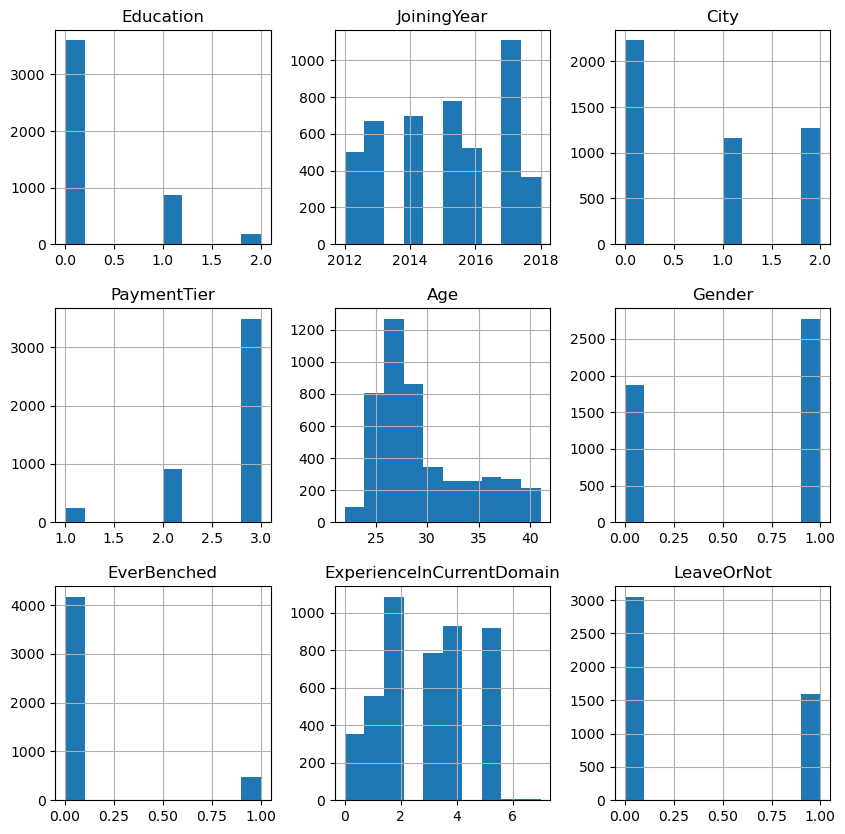

In [7]:
e_df.hist(figsize=(10, 10))

In [8]:
# Education이 2인 행 삭제
e_df = e_df[e_df['Education'] != 2]

In [9]:
# EverBenched 행 삭제
e_df.drop(labels=['EverBenched'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16268\3275662393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_df.drop(labels=['EverBenched'], axis=1, inplace=True)


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>, <Axes: >]], dtype=object)

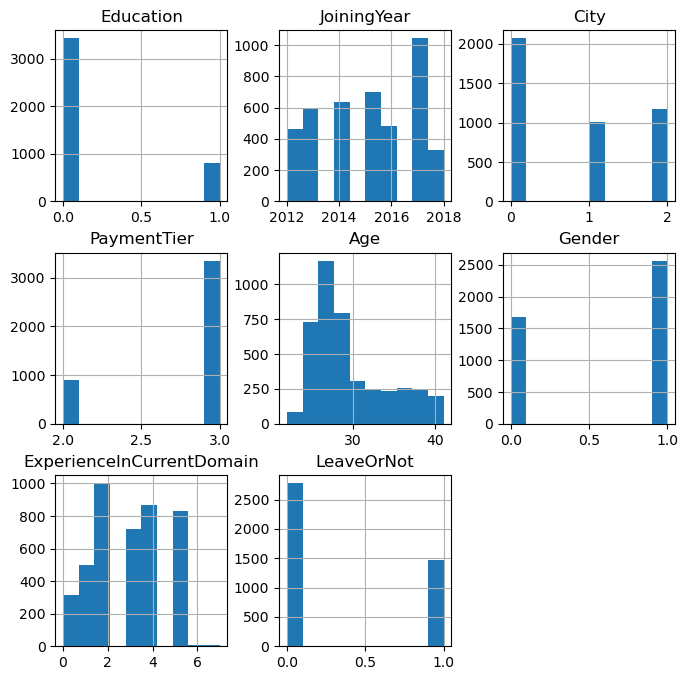

In [78]:
# PaymentTier 1인 행 삭제
e_df = e_df[e_df['PaymentTier'] != 1]
e_df.hist(figsize=(8, 8))

In [11]:
corr = e_df.corr()
corr[['LeaveOrNot']].sort_values(by="LeaveOrNot", ascending=False)[1:]

LeaveOrNot
City                         0.197808
JoiningYear                  0.187680
Education                    0.156101
ExperienceInCurrentDomain   -0.027490
Age                         -0.054496
Gender                      -0.220648
PaymentTier                 -0.281601

Text(0.5, 1.0, 'Correlation')

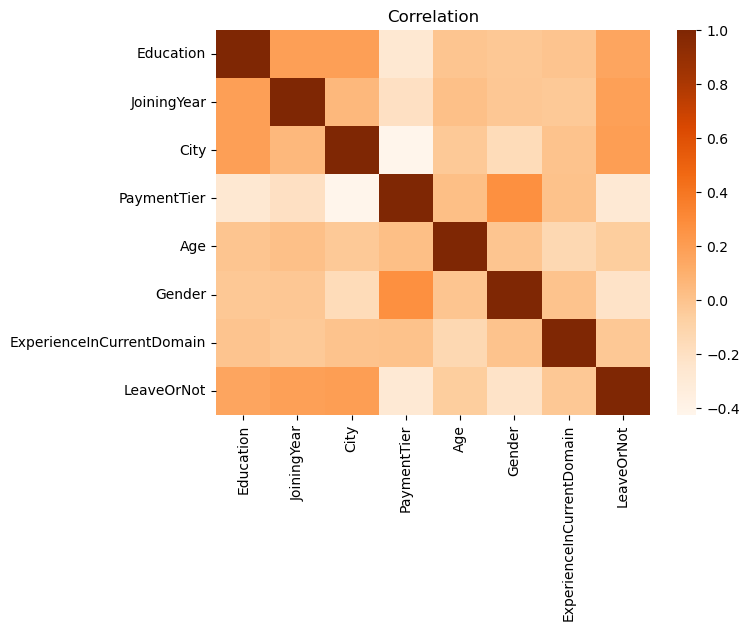

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = e_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [13]:
e_df.describe().T

count         mean       std     min     25%  \
Education                  4245.0     0.192462  0.394280     0.0     0.0   
JoiningYear                4245.0  2015.081743  1.865445  2012.0  2014.0   
City                       4245.0     0.789164  0.848059     0.0     0.0   
PaymentTier                4245.0     2.788457  0.408451     2.0     3.0   
Age                        4245.0    29.389870  4.814068    22.0    26.0   
Gender                     4245.0     0.603769  0.489171     0.0     0.0   
ExperienceInCurrentDomain  4245.0     2.913545  1.549320     0.0     2.0   
LeaveOrNot                 4245.0     0.346054  0.475767     0.0     0.0   

                              50%     75%     max  
Education                     0.0     0.0     1.0  
JoiningYear                2015.0  2017.0  2018.0  
City                          1.0     2.0     2.0  
PaymentTier                   3.0     3.0     3.0  
Age                          28.0    32.0    41.0  
Gender                        1.0     1.0     1.0  
ExperienceInCurrentDomain     3.0     4.0     7.0  
LeaveOrNot                    0.0     1.0     1.0

#### mean과 50%의 차이를 통해 제거할 이상치는 없을 것이라 판단했다.

### 🆕 DTC

In [92]:
pre_e_df = e_df.copy()

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 모델 초기화
dtc = DecisionTreeClassifier()

# features와 targets 설정
features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

# train_test_split을 사용하여 데이터 분할
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# 모델 훈련
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
from sklearn.tree import export_graphviz
# encoder.classes_를 문자열 리스트로 변환
class_names = [str(cls) for cls in encoder.classes_]

# features.columns을 문자열 리스트로 변환
feature_names = list(features.columns)

# export_graphviz() 함수 호출
export_graphviz(
    dtc, 
    out_file='./images/employee_dtc01.dot', 
    class_names=class_names, 
    feature_names=feature_names, 
    impurity=True,
    filled=True
)

In [95]:
import graphviz

with open('./images/employee_dtc01.dot') as f:
    employee_dtc01 = f.read()

employee_dtc01_graph = graphviz.Source(employee_dtc01)

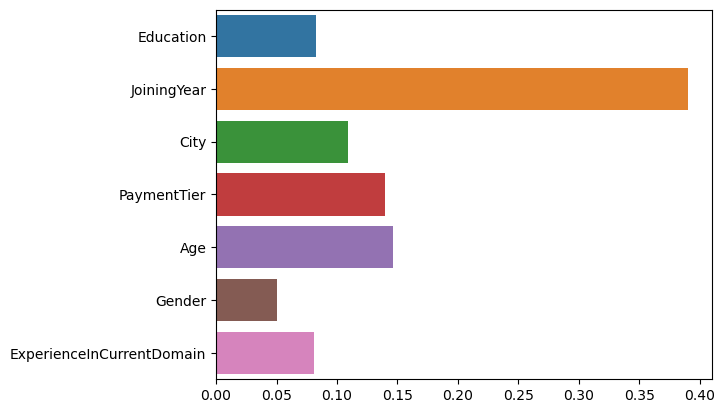

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

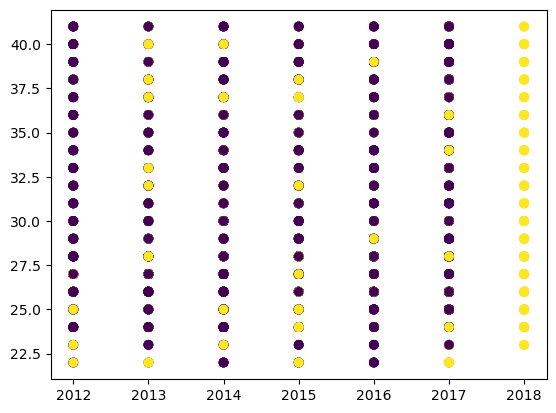

In [97]:
plt.scatter(features.iloc[:, 1], features.iloc[:, 4], c=targets)

In [98]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

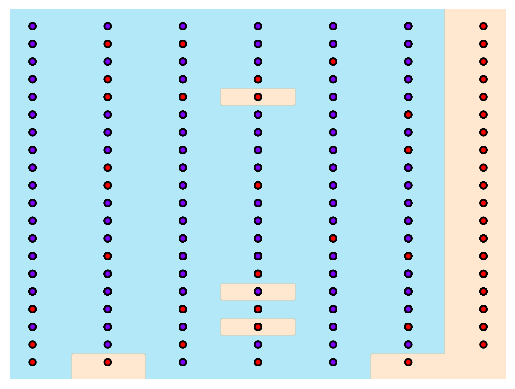

In [99]:
features_1_4 = features.iloc[:, [1, 4]] 
visualize_boundary(dtc, features_1_4, targets)

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(min_samples_leaf=20)

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 모델 훈련
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

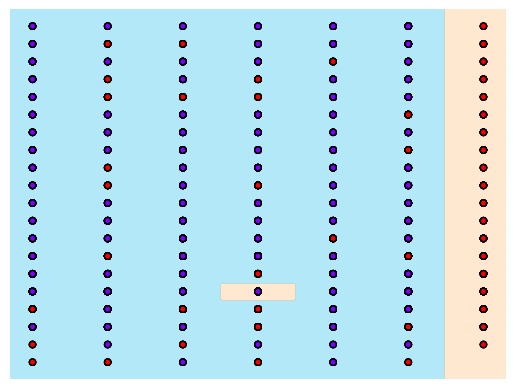

In [101]:
features_1_4 = features.iloc[:, [1, 4]] 
visualize_boundary(dtc, features_1_4, targets)

In [102]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [15, 16, 17, 18], 'min_samples_split': [12, 13, 14]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

params  mean_test_score  \
0   {'max_depth': 15, 'min_samples_split': 12}         0.827150   
1   {'max_depth': 15, 'min_samples_split': 13}         0.828033   
2   {'max_depth': 15, 'min_samples_split': 14}         0.830683   
3   {'max_depth': 16, 'min_samples_split': 12}         0.826855   
4   {'max_depth': 16, 'min_samples_split': 13}         0.828033   
5   {'max_depth': 16, 'min_samples_split': 14}         0.829505   
6   {'max_depth': 17, 'min_samples_split': 12}         0.826855   
7   {'max_depth': 17, 'min_samples_split': 13}         0.826855   
8   {'max_depth': 17, 'min_samples_split': 14}         0.830683   
9   {'max_depth': 18, 'min_samples_split': 12}         0.826561   
10  {'max_depth': 18, 'min_samples_split': 13}         0.827444   
11  {'max_depth': 18, 'min_samples_split': 14}         0.829505   

    rank_test_score  
0                 8  
1                 5  
2                 1  
3                 9  
4                 5  
5                 3  
6                 9  
7                 9  
8                 1  
9                12  
10                7  
11                3

In [103]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 85.159%


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[516  39]
 [ 87 207]]
정확도: 0.8516, 정밀도: 0.8415, 재현율: 0.7041, F1: 0.7667, ROC-AUC: 0.8169
################################################################################


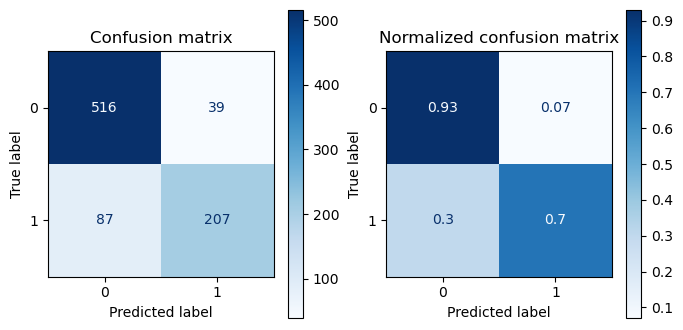

In [105]:
get_evaluation(y_test, prediction, dtc, X_test)

In [107]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
def precision_recall_f1_curve_plot(y_test , proba_class1, threshold=0.5):
    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    # X축: threshold
    # Y축: 정밀도, 재현율
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    plt.plot(thresholds, f1_scores[0:threshold_boundary], linestyle='--', label='f1 Score')
    # Threshold가 0.5인 선 추가
    plt.axvline(x=threshold, color='red', linestyle=':', label='Threshold: {}'.format(threshold))
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall and F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

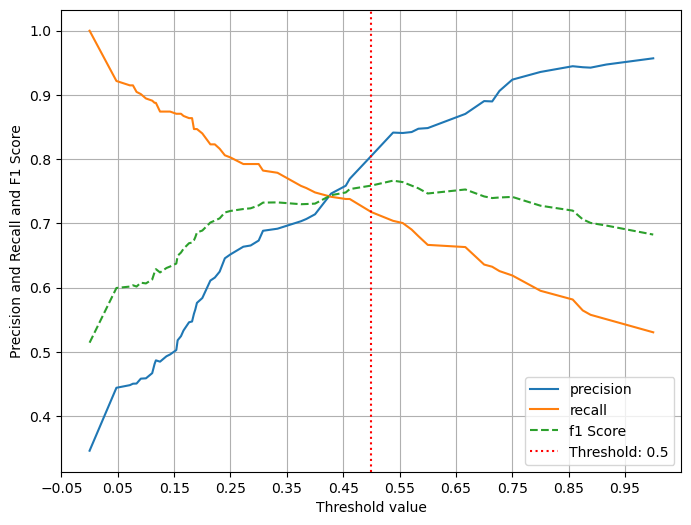

In [108]:
precision_recall_f1_curve_plot(y_test, dtc.predict_proba(X_test)[:, -1].reshape(-1, 1))

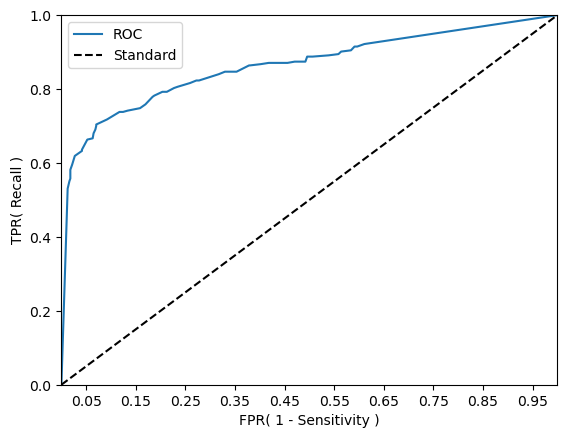

In [109]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [110]:
from sklearn.preprocessing import Binarizer

threshold = 0.6

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[526  29]
 [ 99 195]]
정확도: 0.8492, 정밀도: 0.8705, 재현율: 0.6633, F1: 0.7529, ROC-AUC: 0.8055
################################################################################


In [111]:
proba_class1 = dtc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.04761905, 0.07142857, 0.07692308, 0.08333333,
       0.09090909, 0.1       , 0.11111111, 0.11538462, 0.11764706,
       0.125     , 0.13636364, 0.14285714, 0.15384615, 0.15625   ,
       0.16216216, 0.16666667, 0.17647059, 0.18181818, 0.18518519,
       0.1875    , 0.19047619, 0.2       , 0.21428571, 0.22222222,
       0.23076923, 0.24      , 0.25      , 0.27272727, 0.28571429,
       0.3       , 0.30769231, 0.33333333, 0.375     , 0.38461538,
       0.4       , 0.42857143, 0.45454545, 0.46153846, 0.5       ,
       0.53846154, 0.55555556, 0.57142857, 0.58333333, 0.6       ,
       0.66666667, 0.7       , 0.71428571, 0.72727273, 0.75      ,
       0.8       , 0.85714286, 0.875     , 0.88888889, 0.91666667,
       1.        ])

In [112]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

# get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

In [113]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[216 339]
 [ 23 271]]
정확도: 0.5736, 정밀도: 0.4443, 재현율: 0.9218, F1: 0.5996, ROC-AUC: 0.6555
################################################################################
0.047619047619047616
오차 행렬
[[224 331]
 [ 25 269]]
정확도: 0.5807, 정밀도: 0.4483, 재현율: 0.9150, F1: 0.6018, ROC-AUC: 0.6593
################################################################################
0.07142857142857142
오차 행렬
[[227 328]
 [ 25 269]]
정확도: 0.5842, 정밀도: 0.4506, 재현율: 0.9150, F1: 0.6038, ROC-AUC: 0.6620
################################################################################
0.07692307692307693
오차 행렬
[[231 324]
 [ 28 266]]
정확도: 0.5854, 정밀도: 0.4508, 재현율: 0.9048, F1: 0.6018, ROC-AUC: 0.6605
################################################################################
0.08333333333333333
오차 행렬
[[242 313]
 [ 29 265]]
정확도: 0.5972, 정밀도: 0.4585, 재현율: 0.9014, F1: 0.6078, ROC-AUC: 0.6687
################################################################################
0.09090909090909091
오차 행렬
[[24

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]
        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[453 102]
 [ 65 229]]
정확도: 0.8033, 정밀도: 0.6918, 재현율: 0.7789, F1: 0.7328, ROC-AUC: 0.7976
################################################################################


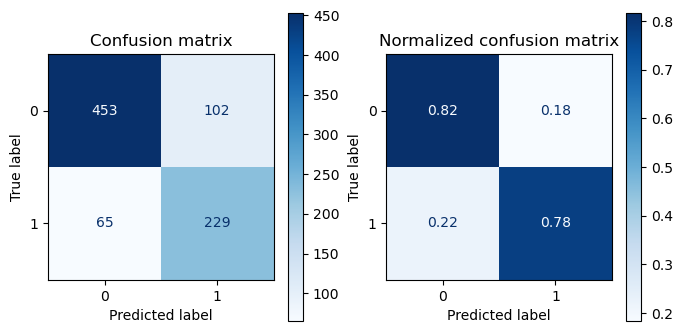

In [117]:
from sklearn.preprocessing import Binarizer

threshold = 0.3076923076923077

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 1 Cycle
임계치를 조정하기 전에도 괜찮은 성능의 모델이라고 판단 되었지만,  
정밀도보다 재현율이 높게 조정하기 위하여 임계치를 낮추었더니 정확도는 낮아졌지만 재현율이 올라간 것을 확인했다.  
다음은 SVC 방식으로 모델을 훈련해보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8504  | 0.8381  | 0.7041  | 0.7652   | 0.8160   |
| 1C(조정후) | 0.8033  | 0.6918  | 0.7789  | 0.7328   | 0.7976   |

### 🆕 SVC

In [570]:
e_df = e_df.reset_index(drop=True)

In [571]:
pre_e_df = e_df.copy()
pre_e_df

Education  JoiningYear  City  PaymentTier  Age  Gender  \
0             0         2017     0            3   34       1   
1             0         2014     1            3   38       0   
2             1         2016     0            3   27       1   
3             1         2017     2            3   24       1   
4             0         2016     0            3   22       1   
...         ...          ...   ...          ...  ...     ...   
4240          0         2013     0            3   26       0   
4241          1         2013     2            2   37       1   
4242          1         2018     1            3   27       1   
4243          0         2012     0            3   30       1   
4244          0         2015     0            3   33       1   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             2           0  
2                             5           1  
3                             2           1  
4                             0           0  
...                         ...         ...  
4240                          4           0  
4241                          2           1  
4242                          5           1  
4243                          2           0  
4244                          4           0  

[4245 rows x 8 columns]

In [572]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 데이터 오버샘플링
smote = SMOTE(random_state=124)
features_resampled, targets_resampled = smote.fit_resample(features, targets)

# 파이프 라인으로 구축한 각 파이프의 이름을 먼저 작성하고, 
# (_)언더바를 두 번(__) 작성한 뒤 파라미터 이름을 작성한다.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 1. 파이프라인 구축
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

# 3. 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [573]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][53])
display(result_df)

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.654005   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.654005   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.654005   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.654005   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.654005   
..                                                ...              ...   
67  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.806248   
68  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.696702   
69  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.758837   
70  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.696702   
71  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.739992   

    rank_test_score  
0                55  
1                55  
2                55  
3                55  
4                55  
..              ...  
67                8  
68               19  
69               10  
70               19  
71               14  

[72 rows x 3 columns]

In [574]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

오차 행렬
[[520  35]
 [ 91 203]]
정확도: 0.8516, 정밀도: 0.8529, 재현율: 0.6905, F1: 0.7632, ROC-AUC: 0.8137
################################################################################


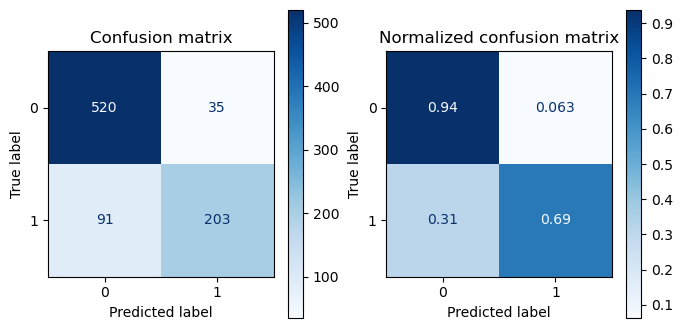

In [575]:
get_evaluation(y_test, prediction, svc, X_test)

In [576]:
proba_class1 = svc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.026317  , 0.02770549, 0.03188575, 0.0356542 , 0.03684237,
       0.05527053, 0.05581194, 0.05612701, 0.05649901, 0.05762088,
       0.05770705, 0.05776924, 0.05940874, 0.05997296, 0.06074381,
       0.06192653, 0.06228358, 0.06250612, 0.06312087, 0.06522583,
       0.06530807, 0.06576657, 0.06590746, 0.0660077 , 0.06638052,
       0.0664374 , 0.06644764, 0.06658198, 0.06865038, 0.06869535,
       0.06952865, 0.07241313, 0.07264838, 0.07271167, 0.07363129,
       0.0737615 , 0.07394435, 0.07450085, 0.07457856, 0.07508132,
       0.07533621, 0.075875  , 0.07665679, 0.0768272 , 0.07686391,
       0.07736762, 0.0777349 , 0.07778529, 0.07927621, 0.07949853,
       0.08010371, 0.08057387, 0.08198671, 0.08238225, 0.08257844,
       0.08309753, 0.08322015, 0.08358816, 0.08402049, 0.08432465,
       0.08462861, 0.08463712, 0.08511067, 0.08526511, 0.08601694,
       0.086463  , 0.08756166, 0.08874629, 0.08967131, 0.09025473,
       0.09059717, 0.09129136, 0.09175761, 0.09201592, 0.09209

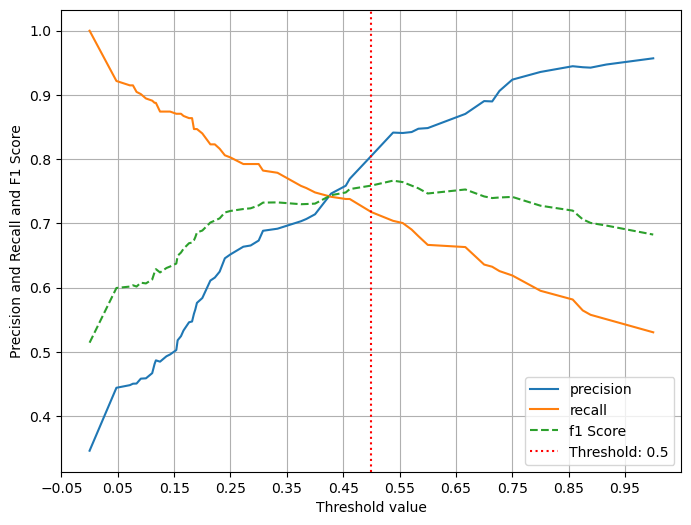

In [577]:
precision_recall_f1_curve_plot(y_test, dtc.predict_proba(X_test)[:, -1].reshape(-1, 1))

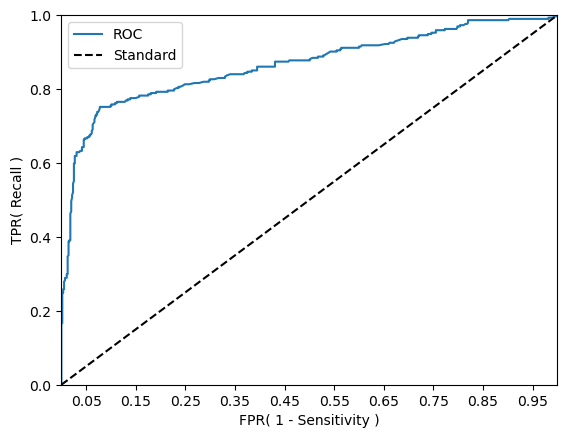

In [578]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, svc.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [579]:
proba = svc.predict_proba(X_test)
prediction = svc.predict(X_test)

In [580]:
proba_class1 = svc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.026317  , 0.02770549, 0.03188575, 0.0356542 , 0.03684237,
       0.05527053, 0.05581194, 0.05612701, 0.05649901, 0.05762088,
       0.05770705, 0.05776924, 0.05940874, 0.05997296, 0.06074381,
       0.06192653, 0.06228358, 0.06250612, 0.06312087, 0.06522583,
       0.06530807, 0.06576657, 0.06590746, 0.0660077 , 0.06638052,
       0.0664374 , 0.06644764, 0.06658198, 0.06865038, 0.06869535,
       0.06952865, 0.07241313, 0.07264838, 0.07271167, 0.07363129,
       0.0737615 , 0.07394435, 0.07450085, 0.07457856, 0.07508132,
       0.07533621, 0.075875  , 0.07665679, 0.0768272 , 0.07686391,
       0.07736762, 0.0777349 , 0.07778529, 0.07927621, 0.07949853,
       0.08010371, 0.08057387, 0.08198671, 0.08238225, 0.08257844,
       0.08309753, 0.08322015, 0.08358816, 0.08402049, 0.08432465,
       0.08462861, 0.08463712, 0.08511067, 0.08526511, 0.08601694,
       0.086463  , 0.08756166, 0.08874629, 0.08967131, 0.09025473,
       0.09059717, 0.09129136, 0.09175761, 0.09201592, 0.09209

In [581]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [582]:
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.026316999219958045
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.02770549408843243
오차 행렬
[[  1 554]
 [  1 293]]
정확도: 0.3463, 정밀도: 0.3459, 재현율: 0.9966, F1: 0.5136, ROC-AUC: 0.4992
################################################################################
0.03188574532477819
오차 행렬
[[  2 553]
 [  1 293]]
정확도: 0.3475, 정밀도: 0.3463, 재현율: 0.9966, F1: 0.5140, ROC-AUC: 0.5001
################################################################################
0.03565420159336848
오차 행렬
[[  3 552]
 [  1 293]]
정확도: 0.3486, 정밀도: 0.3467, 재현율: 0.9966, F1: 0.5145, ROC-AUC: 0.5010
################################################################################
0.03684237115525128
오차 행렬
[[  4 551]
 [  1 293]]
정확도: 0.3498, 정밀도: 0.3472, 재현율: 0.9966, F1: 0.5149, ROC-AUC: 0.5019
################################################################################
0.055270533713

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [585]:
from sklearn.preprocessing import Binarizer

threshold = 0.19867223142894078

proba = svc.predict_proba(X_test)
prediction = svc.predict(X_test)

In [586]:
custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[449 106]
 [ 61 233]]
정확도: 0.8033, 정밀도: 0.6873, 재현율: 0.7925, F1: 0.7362, ROC-AUC: 0.8008
################################################################################


#### 1 Cycle
DTC 모델과 마찬가지로 임계치를 조정하기 전에도 괜찮은 성능의 모델이라고 판단 되었지만,  
정밀도보다 재현율이 높게 조정하기 위하여 임계치를 낮추었더니 정확도는 살짝 낮아졌지만 재현율이 올라간 것을 확인했다.  
다음은 KNN 방식을 이용해 보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 조정 전 | 0.8516  | 0.8529  | 0.6905  | 0.7632   | 0.8137   |
| 조정 후 | 0.8033  | 0.6873  | 0.7925  | 0.7362   | 0.8008   |

### 🆕 KNN

In [399]:
pre_e_df = e_df.copy()

In [400]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

knn_c = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn_c = GridSearchCV(knn_c, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_knn_c.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [401]:
result_df = pd.DataFrame(g_knn_c.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  rank_test_score
0  {'n_neighbors': 3}         0.777680                3
1  {'n_neighbors': 5}         0.794466                1
2  {'n_neighbors': 7}         0.787986                2

In [402]:
knn_c = g_knn_c.best_estimator_
prediction = knn_c.predict(X_test)

오차 행렬
[[519  36]
 [127 167]]
정확도: 0.8080, 정밀도: 0.8227, 재현율: 0.5680, F1: 0.6720, ROC-AUC: 0.7516
################################################################################


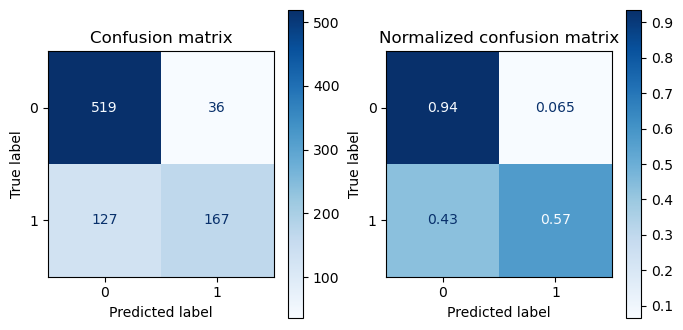

In [403]:
get_evaluation(y_test, prediction, knn_c, X_test)

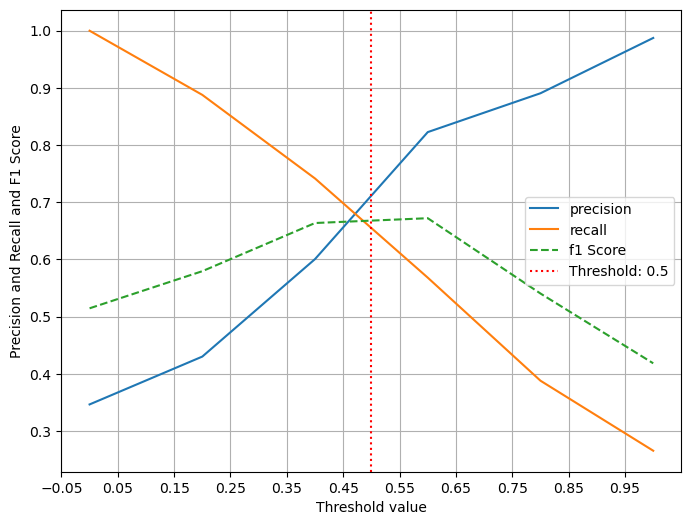

In [404]:
precision_recall_f1_curve_plot(y_test, knn_c.predict_proba(X_test)[:, -1].reshape(-1, 1))

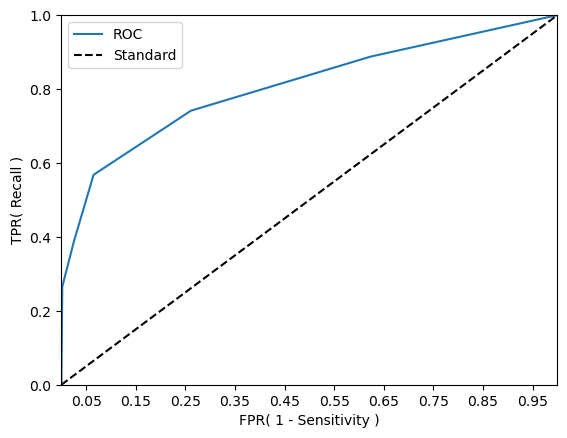

In [405]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, knn_c.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [406]:
proba = knn_c.predict_proba(X_test)
prediction = knn_c.predict(X_test)

In [407]:
proba_class1 = knn_c.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [408]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [409]:
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0
오차 행렬
[[209 346]
 [ 33 261]]
정확도: 0.5536, 정밀도: 0.4300, 재현율: 0.8878, F1: 0.5794, ROC-AUC: 0.6322
################################################################################
0.2
오차 행렬
[[410 145]
 [ 76 218]]
정확도: 0.7397, 정밀도: 0.6006, 재현율: 0.7415, F1: 0.6636, ROC-AUC: 0.7401
################################################################################
0.4
오차 행렬
[[519  36]
 [127 167]]
정확도: 0.8080, 정밀도: 0.8227, 재현율: 0.5680, F1: 0.6720, ROC-AUC: 0.7516
################################################################################
0.6
오차 행렬
[[541  14]
 [180 114]]
정확도: 0.7715, 정밀도: 0.8906, 재현율: 0.3878, F1: 0.5403, ROC-AUC: 0.6813
################################################################################
0.8
오차 행렬
[[554   1]
 [216  78]]
정확도: 0.7444, 정밀도: 0.9873, 재현율: 0.2653, F1: 0.4182, ROC-AUC: 0.6318
################################################################################
1.0
오차 행렬
[[555   0]
 [294   0]]
정확도: 0.6537, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[410 145]
 [ 76 218]]
정확도: 0.7397, 정밀도: 0.6006, 재현율: 0.7415, F1: 0.6636, ROC-AUC: 0.7401
################################################################################


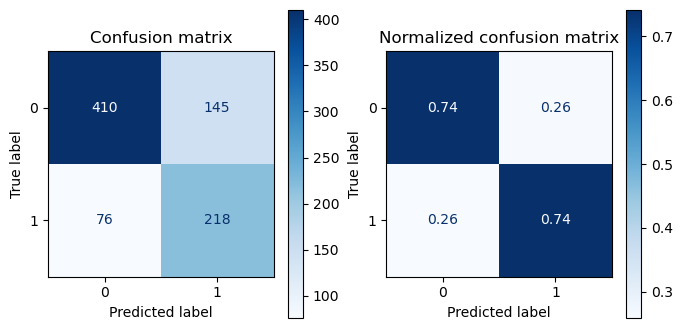

In [410]:
from sklearn.preprocessing import Binarizer

threshold = 0.2

proba = knn_c.predict_proba(X_test)
prediction = knn_c.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 1 Cycle
임계치를 조정하기 전이 재현율이 낮아서 재현율이 높아지게 조정하기 위하여 임계치를 낮추었더니 재현율을 제외한 나머지 수치가 전부 하락했다.  
이를 올리기 위해, 타겟 데이터의 비중을 맞춰보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8080  | 0.8227  | 0.5680  | 0.6720   | 0.7516   |
| 1C(조정후) | 0.7397  | 0.6006  | 0.7415  | 0.6636   | 0.7401   |

In [435]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

knn_c = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn_c = GridSearchCV(knn_c, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_knn_c.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [437]:
result_df = pd.DataFrame(g_knn_c.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  rank_test_score
0  {'n_neighbors': 3}         0.785466                3
1  {'n_neighbors': 5}         0.790421                1
2  {'n_neighbors': 7}         0.787494                2

In [438]:
knn_c = g_knn_c.best_estimator_
prediction = knn_c.predict(X_test)

오차 행렬
[[479  76]
 [107 187]]
정확도: 0.7845, 정밀도: 0.7110, 재현율: 0.6361, F1: 0.6715, ROC-AUC: 0.7496
################################################################################


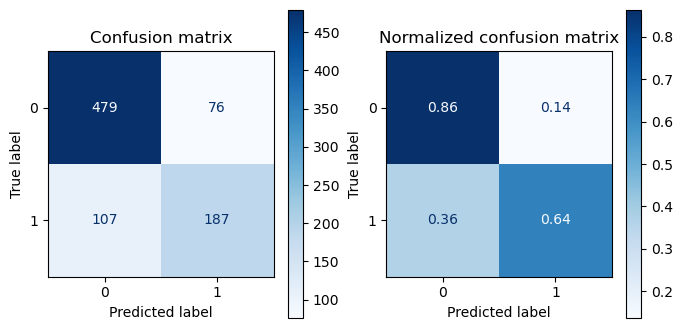

In [439]:
get_evaluation(y_test, prediction, knn_c, X_test)

In [440]:
proba = knn_c.predict_proba(X_test)
prediction = knn_c.predict(X_test)

In [444]:
proba_class1 = knn_c.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

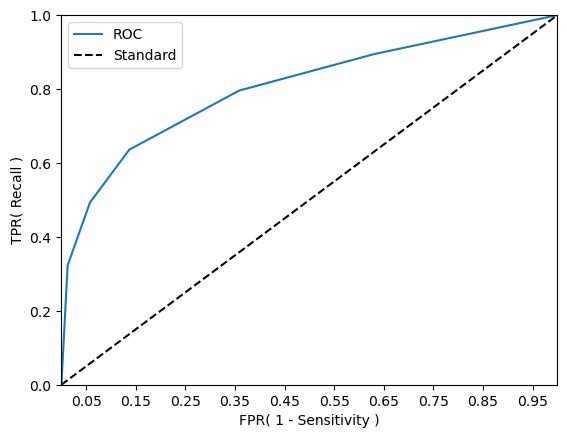

In [450]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, knn_c.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [451]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [452]:
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0
오차 행렬
[[205 350]
 [ 31 263]]
정확도: 0.5512, 정밀도: 0.4290, 재현율: 0.8946, F1: 0.5799, ROC-AUC: 0.6320
################################################################################
0.2
오차 행렬
[[356 199]
 [ 60 234]]
정확도: 0.6949, 정밀도: 0.5404, 재현율: 0.7959, F1: 0.6437, ROC-AUC: 0.7187
################################################################################
0.4
오차 행렬
[[479  76]
 [107 187]]
정확도: 0.7845, 정밀도: 0.7110, 재현율: 0.6361, F1: 0.6715, ROC-AUC: 0.7496
################################################################################
0.6
오차 행렬
[[523  32]
 [149 145]]
정확도: 0.7868, 정밀도: 0.8192, 재현율: 0.4932, F1: 0.6157, ROC-AUC: 0.7178
################################################################################
0.8
오차 행렬
[[548   7]
 [199  95]]
정확도: 0.7574, 정밀도: 0.9314, 재현율: 0.3231, F1: 0.4798, ROC-AUC: 0.6553
################################################################################
1.0
오차 행렬
[[555   0]
 [294   0]]
정확도: 0.6537, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[356 199]
 [ 60 234]]
정확도: 0.6949, 정밀도: 0.5404, 재현율: 0.7959, F1: 0.6437, ROC-AUC: 0.7187
################################################################################


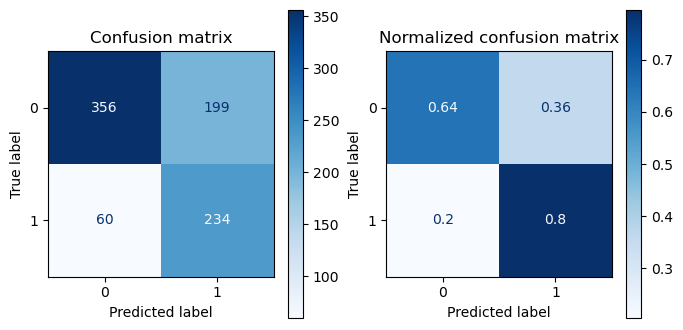

In [453]:
from sklearn.preprocessing import Binarizer

threshold = 0.2

proba = knn_c.predict_proba(X_test)
prediction = knn_c.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 2 Cycle
타겟 데이터의 비중을 맞추고 훈련한 결과, 임계치 조정 전의 재현율 수치는 상승했지만, 임계치 조절 후 모델의 성능이 전체적으로 낮아졌다.  
다음은 배깅(RF) 방식을 이용해 보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8080  | 0.8227  | 0.5680  | 0.6720   | 0.7516   |
| 1C(조정후) | 0.7397  | 0.6006  | 0.7415  | 0.6636   | 0.7401   |
| 2C(조정전) | 0.7845  | 0.7110  | 0.6361  | 0.6715   | 0.7496   |
| 2C(조정후) | 0.6949  | 0.5404  | 0.7959  | 0.6437   | 0.7187   |

### 🆕 배깅 (Random Forest)

In [64]:
pre_e_df = e_df.copy()

In [411]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.LeaveOrNot

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [6, 12, 18, 24]})

In [412]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'max_depth': 1, 'min_samples_split': 6}         0.698472   
1   {'max_depth': 1, 'min_samples_split': 12}         0.696118   
2   {'max_depth': 1, 'min_samples_split': 18}         0.720254   
3   {'max_depth': 1, 'min_samples_split': 24}         0.709650   
4    {'max_depth': 2, 'min_samples_split': 6}         0.792110   
5   {'max_depth': 2, 'min_samples_split': 12}         0.792404   
6   {'max_depth': 2, 'min_samples_split': 18}         0.790932   
7   {'max_depth': 2, 'min_samples_split': 24}         0.791226   
8    {'max_depth': 3, 'min_samples_split': 6}         0.803594   
9   {'max_depth': 3, 'min_samples_split': 12}         0.803004   
10  {'max_depth': 3, 'min_samples_split': 18}         0.798879   
11  {'max_depth': 3, 'min_samples_split': 24}         0.806537   

    rank_test_score  
0                11  
1                12  
2                 9  
3                10  
4                 6  
5                 5  
6                 8  
7                 7  
8                 2  
9                 3  
10                4  
11                1

In [413]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[544  11]
 [165 129]]
정확도: 0.7927, 정밀도: 0.9214, 재현율: 0.4388, F1: 0.5945, ROC-AUC: 0.7095
################################################################################


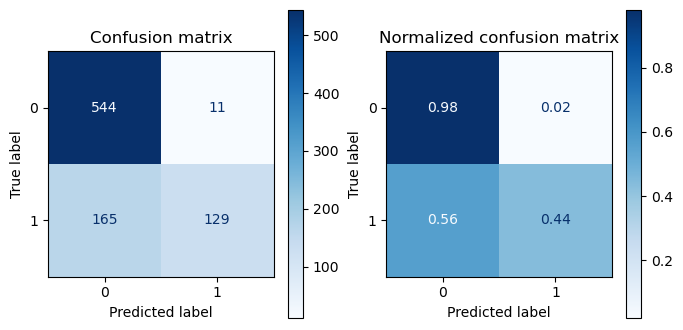

In [414]:
get_evaluation(y_test, prediction, rfc, X_test)

#### 1 Cycle
정밀도가 높고 재현율이 낮았다. 재현율을 높이기 위해서 임계치를 낮춰보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1 Cycle | 0.7927  | 0.9214  | 0.4388  | 0.5945 | 0.7095  |

In [415]:
proba = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)

In [416]:
proba_class1 = rfc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.19184787, 0.19304719, 0.19329256, 0.19366819, 0.19378917,
       0.19409396, 0.19415915, 0.19416109, 0.19419999, 0.19450478,
       0.19454146, 0.19495228, 0.19560948, 0.19572609, 0.19591428,
       0.19610044, 0.19610239, 0.19613691, 0.19640719, 0.19654505,
       0.19767446, 0.19803736, 0.19803931, 0.19900658, 0.19937515,
       0.19978597, 0.19996904, 0.20009002, 0.20046195, 0.20080564,
       0.20111   , 0.20119547, 0.20125762, 0.20127896, 0.20166844,
       0.20168643, 0.20168838, 0.20168978, 0.20190469, 0.20191034,
       0.20213681, 0.20240324, 0.20243776, 0.20270804, 0.20301045,
       0.2030124 , 0.20307793, 0.20322025, 0.20352505, 0.20356889,
       0.20357084, 0.20359218, 0.20366291, 0.203725  , 0.20397255,
       0.20403726, 0.20407373, 0.20433822, 0.20434016, 0.20504057,
       0.20515717, 0.20534537, 0.20553153, 0.20553348, 0.205568  ,
       0.20583632, 0.20583827, 0.20697749, 0.20746845, 0.2074704 ,
       0.21083816, 0.21225015, 0.21228655, 0.21263585, 0.21370

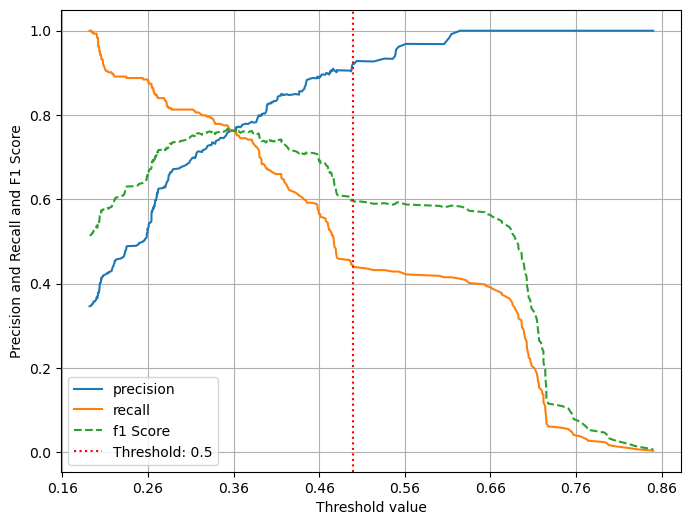

In [417]:
precision_recall_f1_curve_plot(y_test, rfc.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [418]:
proba_class1 = rfc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.19184787, 0.19304719, 0.19329256, 0.19366819, 0.19378917,
       0.19409396, 0.19415915, 0.19416109, 0.19419999, 0.19450478,
       0.19454146, 0.19495228, 0.19560948, 0.19572609, 0.19591428,
       0.19610044, 0.19610239, 0.19613691, 0.19640719, 0.19654505,
       0.19767446, 0.19803736, 0.19803931, 0.19900658, 0.19937515,
       0.19978597, 0.19996904, 0.20009002, 0.20046195, 0.20080564,
       0.20111   , 0.20119547, 0.20125762, 0.20127896, 0.20166844,
       0.20168643, 0.20168838, 0.20168978, 0.20190469, 0.20191034,
       0.20213681, 0.20240324, 0.20243776, 0.20270804, 0.20301045,
       0.2030124 , 0.20307793, 0.20322025, 0.20352505, 0.20356889,
       0.20357084, 0.20359218, 0.20366291, 0.203725  , 0.20397255,
       0.20403726, 0.20407373, 0.20433822, 0.20434016, 0.20504057,
       0.20515717, 0.20534537, 0.20553153, 0.20553348, 0.205568  ,
       0.20583632, 0.20583827, 0.20697749, 0.20746845, 0.2074704 ,
       0.21083816, 0.21225015, 0.21228655, 0.21263585, 0.21370

In [419]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [420]:
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.191847869803524
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.1930471945947865
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.19329255763258296
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.19366818610759082
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.1937891664033985
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.19409396189444042

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [421]:
from sklearn.preprocessing import Binarizer

threshold = 0.3089200557147011

proba = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)

오차 행렬
[[452 103]
 [ 55 239]]
정확도: 0.8139, 정밀도: 0.6988, 재현율: 0.8129, F1: 0.7516, ROC-AUC: 0.8137
################################################################################


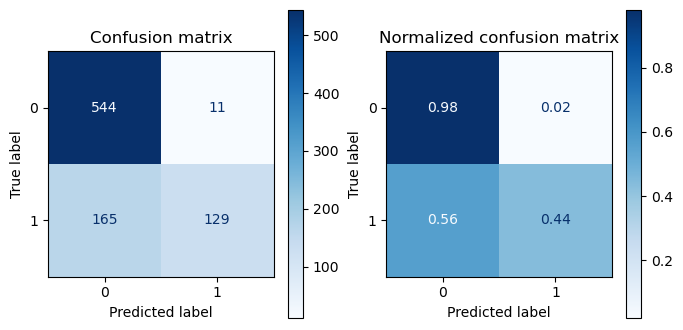

In [422]:
custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction, rfc, X_test)

#### 2 Cycle
임계치를 조정하였더니 재현율을 높일 수 있었다. 동시에 정확도, F1 score, ROC-AUC 수치도 상승하였다.  
다음은 AdaBoost 방식으로 모델을 훈련시키고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1 Cycle | 0.7927  | 0.9214  | 0.4388  | 0.5945 | 0.7095  |
| 2 Cycle | 0.8139  | 0.6988  | 0.8129  | 0.7516 | 0.8137  |

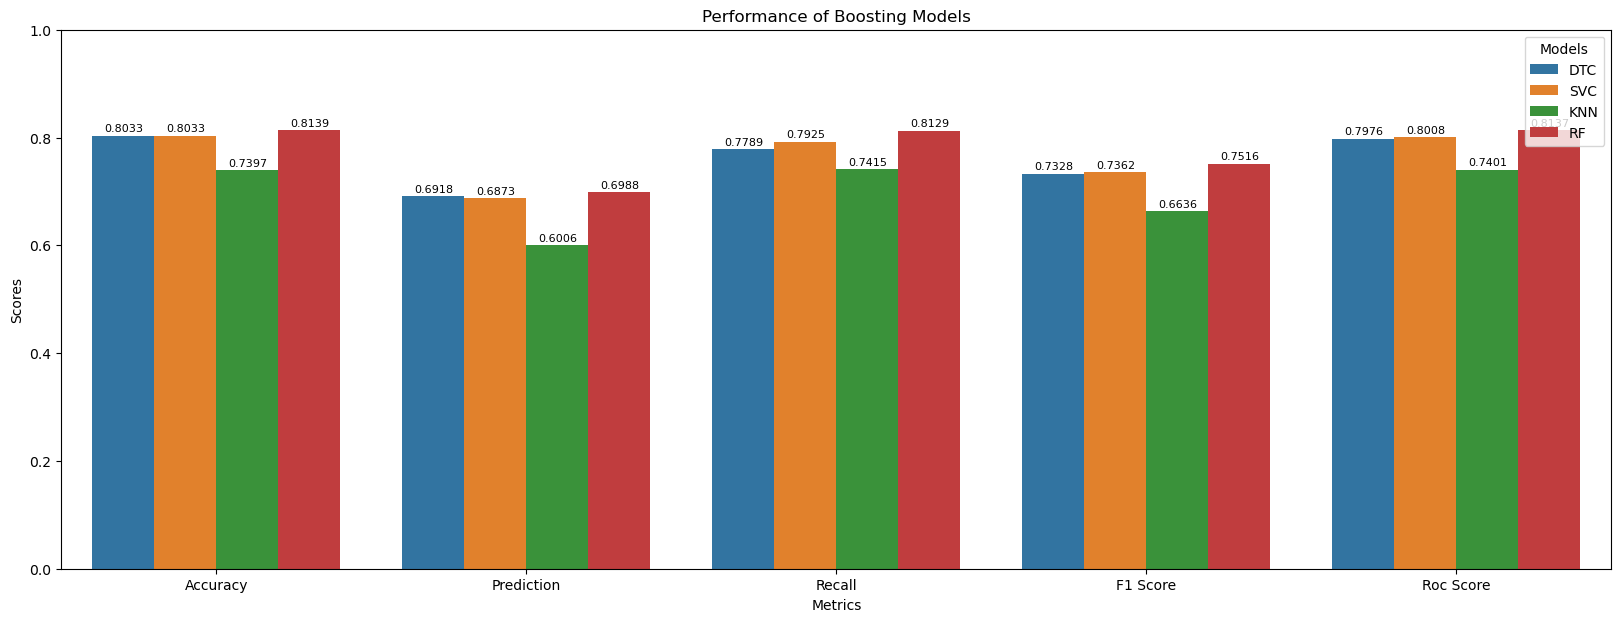

In [587]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 모델에서 얻은 성능 지표
model_names = ['DTC', 'SVC', 'KNN', 'RF']
accuracy_scores = [0.8033, 0.8033, 0.7397, 0.8139]
prediction_scores = [0.6918, 0.6873, 0.6006, 0.6988] 
recall_scores = [0.7789, 0.7925, 0.7415, 0.8129]
f1_scores = [0.7328, 0.7362, 0.6636, 0.7516]
roc_scores = [0.7976, 0.8008, 0.7401, 0.8137]

# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Prediction': prediction_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Roc Score': roc_scores
})

# 데이터프레임 재구성
df = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# seaborn을 사용하여 barplot 생성
plt.figure(figsize=(20, 7))
ax = sns.barplot(data=df, x='Metric', y='Score', hue='Model')

# 각 막대 위에 수치 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=8)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance of Boosting Models')
plt.ylim(0, 1)  # y축 범위 설정
plt.legend(title='Models')
plt.show()

### 📍 결과
#### [각 수치별 1위]
- Accuracy: 배깅RF (0.8139)
- Prediction: 배깅RF (0.6988)
- Recall: 배깅RF (0.8129)
- F1 Score: 배깅RF (0.7516)
- ROC Score: 배깅RF (0.8137)

#### [각 수치별 4위]
- Accuracy: KNN
- Prediction: KNN
- Recall: KNN
- F1 Score: KNN
- ROC Score: KNN

👍 가장 성능이 우수한 모델은 배깅(Random forest)를 이용하여 훈련한 모델이였으며, 0.7~8 정도의 성능을 나타냈다.  

👎 가장 성능이 안좋았던 모델은 KNN(K-Nearest Neighbor)을 이용하여 훈련한 모델이였으며, 0.6~7 정도의 성능을 나타냈다.

### 🆕 AdaBoost

In [456]:
e_df = e_df.reset_index(drop=True)
pre_e_df = e_df.copy()
pre_e_df

Education  JoiningYear  City  PaymentTier  Age  Gender  \
0             0         2017     0            3   34       1   
1             0         2014     1            3   38       0   
2             1         2016     0            3   27       1   
3             1         2017     2            3   24       1   
4             0         2016     0            3   22       1   
...         ...          ...   ...          ...  ...     ...   
4240          0         2013     0            3   26       0   
4241          1         2013     2            2   37       1   
4242          1         2018     1            3   27       1   
4243          0         2012     0            3   30       1   
4244          0         2015     0            3   33       1   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             2           0  
2                             5           1  
3                             2           1  
4                             0           0  
...                         ...         ...  
4240                          4           0  
4241                          2           1  
4242                          5           1  
4243                          2           0  
4244                          4           0  

[4245 rows x 8 columns]

In [457]:
# train, test 나누기
from sklearn.model_selection import train_test_split

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [458]:
# 타겟 데이터 비중 맞추기
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [459]:
y_train_over.value_counts()

LeaveOrNot
0    2221
1    2221
Name: count, dtype: int64

In [460]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [461]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.760926   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.761602   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.764077   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.762501   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.763627   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.762501   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.762951   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.762725   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.764527   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.762951   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.762726   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.762276   
12     {'learning_rate': 1, 'n_estimators': 50}         0.761826   
13    {'learning_rate': 1, 'n_estimators': 100}         0.762951   
14    {'learning_rate': 1, 'n_estimators': 150}         0.762052   
15    {'learning_rate': 1, 'n_estimators': 200}         0.761827   

    rank_test_score  
0                16  
1                15  
2                 2  
3                 9  
4                 3  
5                 9  
6                 4  
7                 8  
8                 1  
9                 6  
10                7  
11               11  
12               14  
13                5  
14               12  
15               13

In [462]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[457  98]
 [ 84 210]]
정확도: 0.7856, 정밀도: 0.6818, 재현율: 0.7143, F1: 0.6977, ROC-AUC: 0.7689
################################################################################


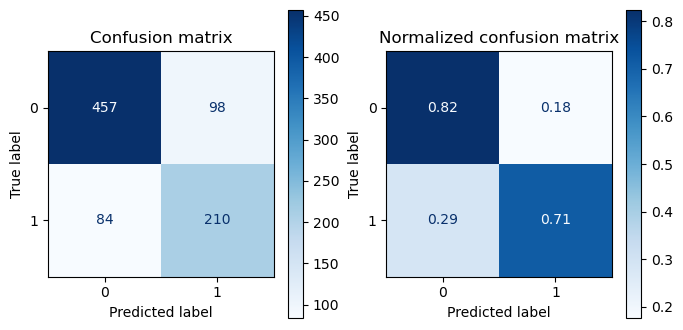

In [463]:
get_evaluation(y_test, prediction, ada, X_test)

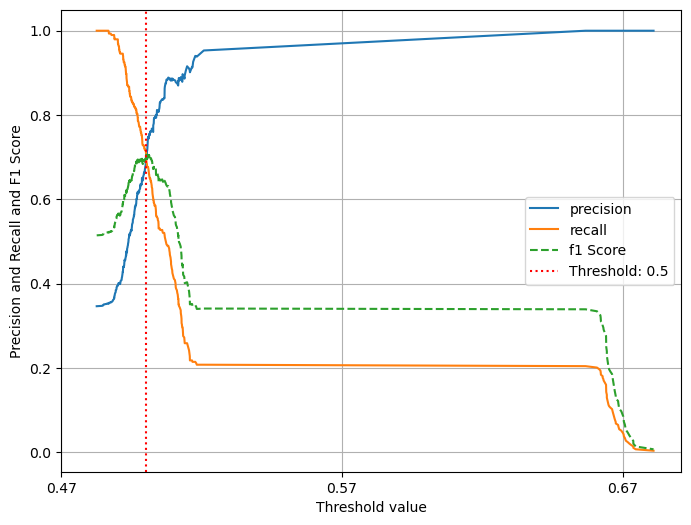

In [464]:
precision_recall_f1_curve_plot(y_test, ada.predict_proba(X_test)[:, -1].reshape(-1, 1))

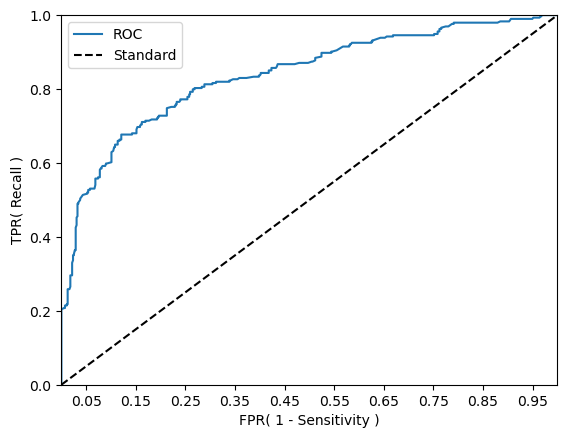

In [465]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, ada.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [466]:
proba = ada.predict_proba(X_test)
prediction = ada.predict(X_test)

In [467]:
proba_class1 = ada.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.48258222, 0.48365559, 0.48437064, 0.48471677, 0.48473679,
       0.48484817, 0.48491714, 0.48503512, 0.48506158, 0.48530006,
       0.48609022, 0.48609236, 0.48643723, 0.48665578, 0.48677379,
       0.4868826 , 0.48688701, 0.48693936, 0.48700174, 0.48744821,
       0.48753536, 0.48756408, 0.48783984, 0.48785952, 0.48794176,
       0.48817509, 0.48822785, 0.48832702, 0.48833927, 0.48834587,
       0.4883872 , 0.48844505, 0.48861626, 0.48873428, 0.48874077,
       0.48874825, 0.48879132, 0.4888588 , 0.48887388, 0.48888048,
       0.48892278, 0.4889246 , 0.48899178, 0.48902039, 0.48903603,
       0.48904263, 0.48913629, 0.48913843, 0.48923547, 0.48932596,
       0.48936826, 0.48937007, 0.48948811, 0.48958391, 0.48964925,
       0.48965139, 0.48966109, 0.48974334, 0.48978438, 0.48983309,
       0.48986138, 0.48997562, 0.49006479, 0.49011369, 0.49011858,
       0.49014752, 0.49016089, 0.49026556, 0.49029414, 0.49044189,
       0.49046358, 0.49053038, 0.49056964, 0.49065189, 0.49068

In [468]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.48258222132267975
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.4836555865697546
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.4843706406818433
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.48471676825954724
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.48473678588052593
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.484848169627937

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [471]:
from sklearn.preprocessing import Binarizer

threshold = 0.497247462599031

proba = ada.predict_proba(X_test)
prediction = ada.predict(X_test)

오차 행렬
[[412 143]
 [ 63 231]]
정확도: 0.7574, 정밀도: 0.6176, 재현율: 0.7857, F1: 0.6916, ROC-AUC: 0.7640
################################################################################


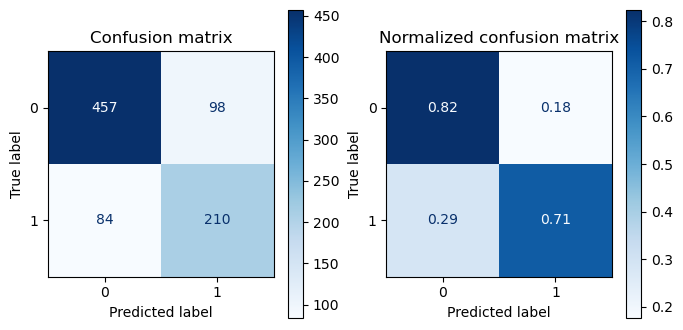

In [472]:
custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction, ada, X_test)

#### 1 Cycle
타겟 데이터의 비중을 맞춘 뒤 훈련을 진행한 결과 재현율을 더 높이기 위해서 임계치를 조정하였다.  
전체 스케일링도 진행해보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.7703  | 0.6656  | 0.6769  | 0.6712  | 0.7483  |
| 1C(조정후) | 0.7574  | 0.6176  | 0.7857  | 0.6916  | 0.7640  |

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

parameters = {
    'ada__n_estimators': [50, 100, 150, 200],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', AdaBoostClassifier())])

g_ada = GridSearchCV(ada_pipe, param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150, 200]})

In [209]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.759124   
1   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.760252   
2   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.764079   
3   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.767681   
4   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.760252   
5   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.765205   
6   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.769257   
7   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.769481   
8   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.763854   
9   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.768581   
10  {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.770381   
11  {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.770157   
12  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.768357   
13  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.767230   
14  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.766105   
15  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.764980   

    rank_test_score  
0                16  
1                15  
2                12  
3                 7  
4                14  
5                10  
6                 4  
7                 3  
8                13  
9                 5  
10                1  
11                2  
12                6  
13                8  
14                9  
15               11

In [210]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[455 100]
 [ 95 199]]
정확도: 0.7703, 정밀도: 0.6656, 재현율: 0.6769, F1: 0.6712, ROC-AUC: 0.7483
################################################################################


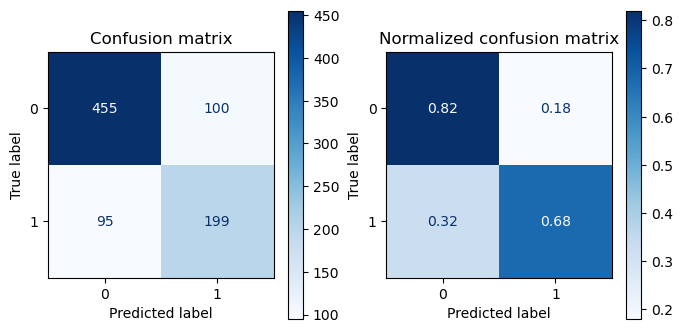

In [211]:
get_evaluation(y_test, prediction, ada, X_test)

In [212]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

parameters = {
    'ada__n_estimators': [50, 100, 150, 200],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('ada', AdaBoostClassifier())])

g_ada = GridSearchCV(ada_pipe, param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150, 200]})

In [213]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.759124   
1   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.760252   
2   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.764079   
3   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.767681   
4   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.760252   
5   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.765205   
6   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.769257   
7   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.769481   
8   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.763854   
9   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.768581   
10  {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.770381   
11  {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.770157   
12  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.768357   
13  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.767230   
14  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.766105   
15  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.764980   

    rank_test_score  
0                16  
1                15  
2                12  
3                 7  
4                14  
5                10  
6                 4  
7                 3  
8                13  
9                 5  
10                1  
11                2  
12                6  
13                8  
14                9  
15               11

In [214]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[455 100]
 [ 95 199]]
정확도: 0.7703, 정밀도: 0.6656, 재현율: 0.6769, F1: 0.6712, ROC-AUC: 0.7483
################################################################################


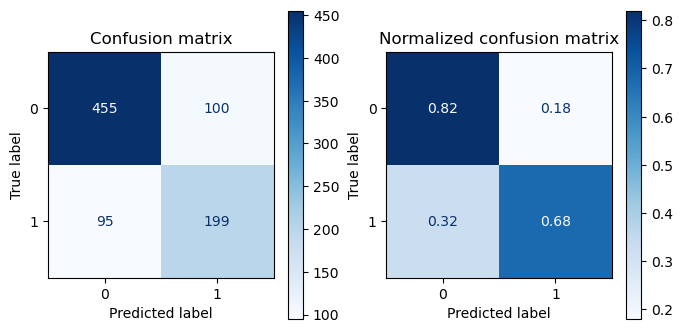

In [215]:
get_evaluation(y_test, prediction, ada, X_test)

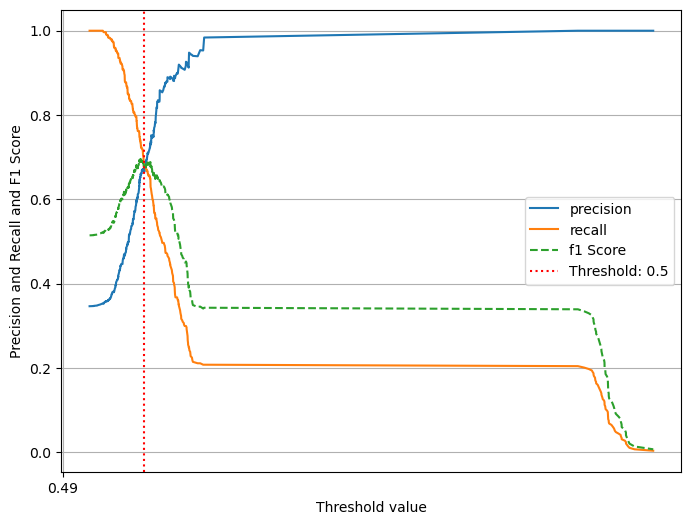

In [217]:
precision_recall_f1_curve_plot(y_test, ada.predict_proba(X_test)[:, -1].reshape(-1, 1))

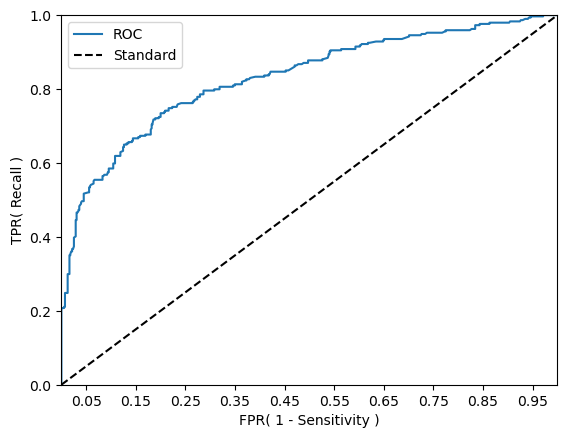

In [216]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, ada.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [218]:
proba = ada.predict_proba(X_test)
prediction = ada.predict(X_test)

In [219]:
proba_class1 = ada.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.49329059, 0.4937906 , 0.49380197, 0.4942351 , 0.49425403,
       0.4942998 , 0.49437551, 0.49446777, 0.49454918, 0.4946052 ,
       0.49466431, 0.49473953, 0.49484806, 0.49489383, 0.49491894,
       0.49500892, 0.49501367, 0.49505944, 0.49506473, 0.49506476,
       0.49513104, 0.49513371, 0.49516301, 0.49517948, 0.49519234,
       0.49525549, 0.49526362, 0.49528305, 0.49529242, 0.49530746,
       0.49532983, 0.4953756 , 0.49551371, 0.49552509, 0.49553291,
       0.49559897, 0.49560372, 0.49561532, 0.49561583, 0.49564949,
       0.49566719, 0.49578924, 0.49579977, 0.49580286, 0.49580522,
       0.49580761, 0.49585531, 0.49585871, 0.49586433, 0.49586752,
       0.49587894, 0.49589247, 0.49592663, 0.49592958, 0.49592988,
       0.49595825, 0.49595934, 0.49597566, 0.49598629, 0.49599898,
       0.49600402, 0.49601716, 0.49602432, 0.49606313, 0.49606638,
       0.49608083, 0.49610883, 0.49614436, 0.49619511, 0.49620347,
       0.49624529, 0.49626211, 0.49626928, 0.49627963, 0.49628

In [220]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.49329059196498987
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.49379059762049476
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.4938019716108199
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.49423510403435783
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.4942540297834668
오차 행렬
[[  6 549]
 [  0 294]]
정확도: 0.3534, 정밀도: 0.3488, 재현율: 1.0000, F1: 0.5172, ROC-AUC: 0.5054
################################################################################
0.494299798067832

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[444 111]
 [ 78 216]]
정확도: 0.7774, 정밀도: 0.6606, 재현율: 0.7347, F1: 0.6957, ROC-AUC: 0.7673
################################################################################


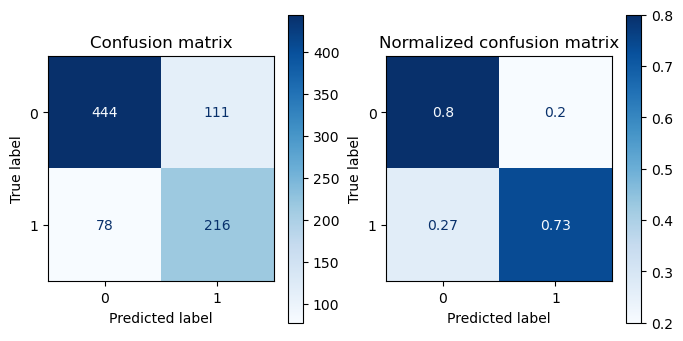

In [223]:
from sklearn.preprocessing import Binarizer

threshold = 0.49956294591811656

proba = ada.predict_proba(X_test)
prediction = ada.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 2 Cycle
전체 스케일링까지 진행하였으나, 이전과 큰 차이는 없었다.  
다음으로는 GBM 방식을 사용해보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.7786  | 0.6743  | 0.6973  | 0.6856  | 0.7595  |
| 1C(조정후) | 0.7703  | 0.6469  | 0.7415  | 0.6910  | 0.7635  |
| 2C(조정전) | 0.7786  | 0.6743  | 0.6973  | 0.6856  | 0.7595  |
| 2C(조정후) | 0.7774  | 0.6606  | 0.7347  | 0.6957  | 0.7673  |

In [473]:
pre_e_df = e_df.copy()

In [474]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.LeaveOrNot

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [475]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.850707   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.853945   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.851590   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.850412   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.852768   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.848352   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.848056   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.844524   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.845114   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.844231   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.841286   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.838342   
12     {'learning_rate': 1, 'n_estimators': 50}         0.842169   
13    {'learning_rate': 1, 'n_estimators': 100}         0.841581   
14    {'learning_rate': 1, 'n_estimators': 150}         0.841876   
15    {'learning_rate': 1, 'n_estimators': 200}         0.838931   

    rank_test_score  
0                 4  
1                 1  
2                 3  
3                 5  
4                 2  
5                 6  
6                 7  
7                 9  
8                 8  
9                10  
10               14  
11               16  
12               11  
13               13  
14               12  
15               15

In [476]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

오차 행렬
[[526  29]
 [ 93 201]]
정확도: 0.8563, 정밀도: 0.8739, 재현율: 0.6837, F1: 0.7672, ROC-AUC: 0.8157
################################################################################


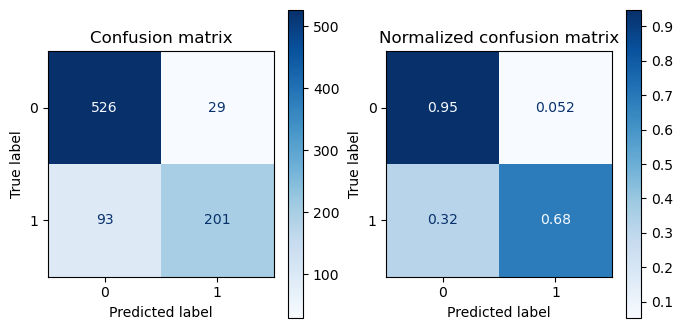

In [477]:
get_evaluation(y_test, prediction, gbc, X_test)

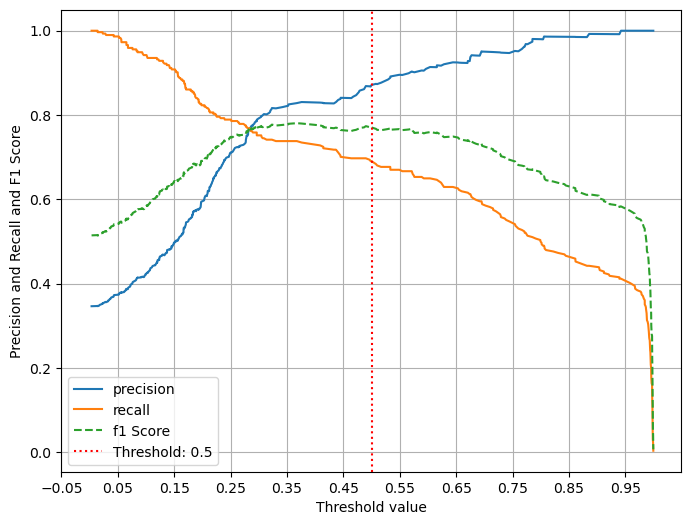

In [478]:
precision_recall_f1_curve_plot(y_test, gbc.predict_proba(X_test)[:, -1].reshape(-1, 1))

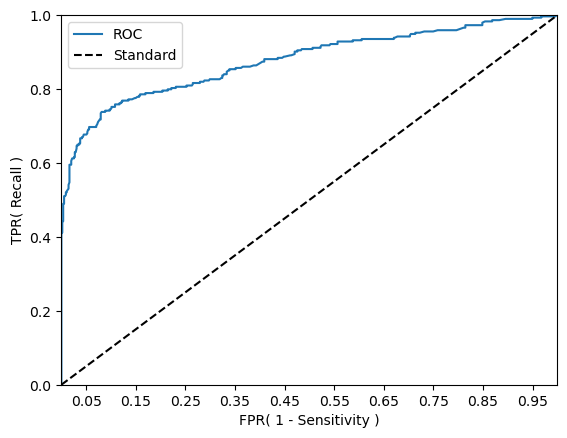

In [481]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, gbc.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [482]:
proba = gbc.predict_proba(X_test)
prediction = gbc.predict(X_test)

In [483]:
proba_class1 = gbc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.00348509, 0.01240422, 0.01422166, 0.01428231, 0.01491429,
       0.01590981, 0.01683412, 0.01721742, 0.01727837, 0.01749941,
       0.01769155, 0.01894504, 0.02020733, 0.02098436, 0.02152807,
       0.02220567, 0.02243924, 0.02293366, 0.02337117, 0.02377566,
       0.02406116, 0.02433927, 0.02523394, 0.02565745, 0.02665208,
       0.02691853, 0.02737074, 0.02790446, 0.02918621, 0.02963885,
       0.030702  , 0.03123695, 0.03220346, 0.03227752, 0.03285597,
       0.033092  , 0.03316233, 0.03319812, 0.03410843, 0.03548537,
       0.0357145 , 0.03702964, 0.037176  , 0.0377579 , 0.03776394,
       0.0382064 , 0.0385301 , 0.03871482, 0.04093004, 0.0419053 ,
       0.0423139 , 0.04268078, 0.04276759, 0.04348025, 0.04671011,
       0.05140357, 0.05178806, 0.05179146, 0.05206998, 0.05238763,
       0.05371678, 0.05382913, 0.05429118, 0.05454692, 0.05613303,
       0.05643325, 0.05693157, 0.05858412, 0.0611076 , 0.06140394,
       0.06170308, 0.06170473, 0.06171853, 0.0621468 , 0.06320

In [484]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0034850920025208602
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.012404222701084731
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.014221663830136915
오차 행렬
[[  2 553]
 [  1 293]]
정확도: 0.3475, 정밀도: 0.3463, 재현율: 0.9966, F1: 0.5140, ROC-AUC: 0.5001
################################################################################
0.014282307736354145
오차 행렬
[[  3 552]
 [  1 293]]
정확도: 0.3486, 정밀도: 0.3467, 재현율: 0.9966, F1: 0.5145, ROC-AUC: 0.5010
################################################################################
0.014914290741433694
오차 행렬
[[  4 551]
 [  1 293]]
정확도: 0.3498, 정밀도: 0.3472, 재현율: 0.9966, F1: 0.5149, ROC-AUC: 0.5019
################################################################################
0.0159098

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[436 119]
 [ 59 235]]
정확도: 0.7903, 정밀도: 0.6638, 재현율: 0.7993, F1: 0.7253, ROC-AUC: 0.7925
################################################################################


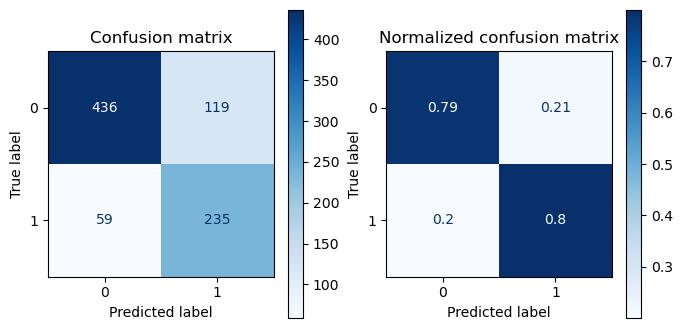

In [485]:
from sklearn.preprocessing import Binarizer

threshold = 0.22472855737169192

proba = gbc.predict_proba(X_test)
prediction = gbc.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 1 Cycle
재현율을 높이기 위해서 임계치를 조정하였으나 조금 더 나은 성능을 위해 타겟 데이터의 비중을 맞춰보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8563  | 0.8739  | 0.6837  | 0.7672  | 0.8157  |
| 1C(조정후) | 0.7903  | 0.6638  | 0.7993  | 0.7253  | 0.7925  |

In [486]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.LeaveOrNot

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [487]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.815399   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.810674   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.808875   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.811577   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.814051   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.814051   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.810225   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.812477   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.815401   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.812254   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.809552   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.808427   
12     {'learning_rate': 1, 'n_estimators': 50}         0.806851   
13    {'learning_rate': 1, 'n_estimators': 100}         0.805501   
14    {'learning_rate': 1, 'n_estimators': 150}         0.808878   
15    {'learning_rate': 1, 'n_estimators': 200}         0.807527   

    rank_test_score  
0                 2  
1                 8  
2                12  
3                 7  
4                 3  
5                 4  
6                 9  
7                 5  
8                 1  
9                 6  
10               10  
11               13  
12               15  
13               16  
14               11  
15               14

In [488]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

오차 행렬
[[489  66]
 [ 78 216]]
정확도: 0.8304, 정밀도: 0.7660, 재현율: 0.7347, F1: 0.7500, ROC-AUC: 0.8079
################################################################################


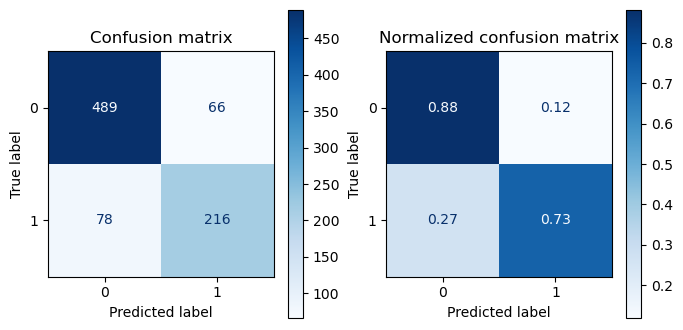

In [489]:
get_evaluation(y_test, prediction, gbc, X_test)

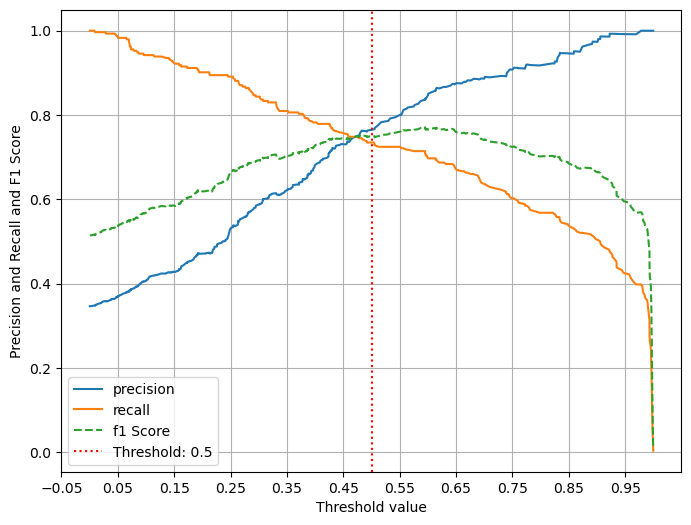

In [490]:
precision_recall_f1_curve_plot(y_test, gbc.predict_proba(X_test)[:, -1].reshape(-1, 1))

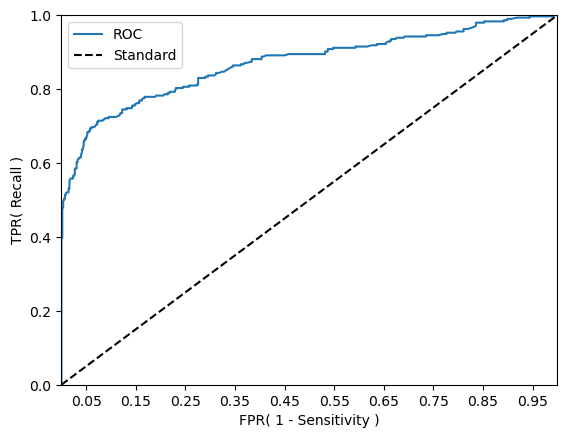

In [491]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, gbc.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [492]:
proba = gbc.predict_proba(X_test)
prediction = gbc.predict(X_test)

In [493]:
proba_class1 = gbc.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([4.00050219e-04, 4.75715283e-03, 5.14876395e-03, 6.57485629e-03,
       8.54886385e-03, 9.60881981e-03, 9.72356885e-03, 1.02246670e-02,
       1.03444233e-02, 1.07249961e-02, 1.09154035e-02, 1.24254615e-02,
       1.29394784e-02, 1.32712025e-02, 1.36357341e-02, 1.48882215e-02,
       1.59703022e-02, 1.67530012e-02, 1.71688705e-02, 2.01709523e-02,
       2.03285820e-02, 2.13880891e-02, 2.16259647e-02, 2.19187228e-02,
       2.25095991e-02, 2.32190694e-02, 2.34049658e-02, 2.58268830e-02,
       2.59914951e-02, 2.86474720e-02, 2.91034697e-02, 3.22013864e-02,
       3.33686411e-02, 3.35861154e-02, 3.42114081e-02, 3.50758544e-02,
       3.67566330e-02, 3.76301423e-02, 3.77562396e-02, 3.80557438e-02,
       3.80713528e-02, 3.81426327e-02, 3.83724523e-02, 4.41342274e-02,
       4.49909785e-02, 4.65606484e-02, 4.69593681e-02, 4.72457615e-02,
       4.85255617e-02, 4.86589160e-02, 4.89844511e-02, 4.96305226e-02,
       5.00484461e-02, 5.03847352e-02, 5.04965158e-02, 5.07979122e-02,
      

In [494]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.00040005021892849864
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.00475715283244554
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.005148763952740978
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.0065748562851891445
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.008548863851907796
오차 행렬
[[  4 551]
 [  1 293]]
정확도: 0.3498, 정밀도: 0.3472, 재현율: 0.9966, F1: 0.5149, ROC-AUC: 0.5019
################################################################################
0.009608

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[450 105]
 [ 59 235]]
정확도: 0.8068, 정밀도: 0.6912, 재현율: 0.7993, F1: 0.7413, ROC-AUC: 0.8051
################################################################################


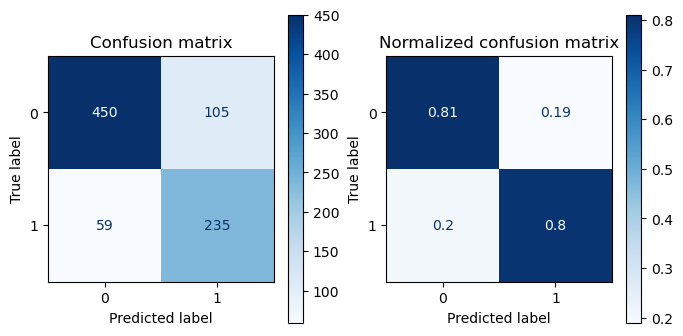

In [250]:
from sklearn.preprocessing import Binarizer

threshold = 0.37807563202552075

proba = gbc.predict_proba(X_test)
prediction = gbc.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 2 Cycle
타겟 데이터의 비중을 맞췄더니 재현율, F1 Score 수치가 조금 올랐다.  
다음으로는 XGBoost 방식을 이용하여 훈련을 진행하고자한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8563  | 0.8739  | 0.6837  | 0.7672  | 0.8157  |
| 1C(조정후) | 0.8057  | 0.6914  | 0.7925  | 0.7385  | 0.8026  |
| 2C(조정전) | 0.8304  | 0.7660  | 0.7347  | 0.7500  | 0.8079  |
| 2C(조정후) | 0.8068  | 0.6912  | 0.7993  | 0.7413  | 0.8051  |

### 🆕 XGBoost

In [495]:
pre_e_df = e_df.copy()

In [496]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.LeaveOrNot

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [497]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.51867	validation_1-logloss:0.52549
[1]	validation_0-logloss:0.45721	validation_1-logloss:0.46629
[2]	validation_0-logloss:0.42053	validation_1-logloss:0.43040
[3]	validation_0-logloss:0.39621	validation_1-logloss:0.40682
[4]	validation_0-logloss:0.38056	validation_1-logloss:0.39212
[5]	validation_0-logloss:0.36988	validation_1-logloss:0.38021
[6]	validation_0-logloss:0.35950	validation_1-logloss:0.37155
[7]	validation_0-logloss:0.35251	validation_1-logloss:0.36426
[8]	validation_0-logloss:0.34835	validation_1-logloss:0.35974
[9]	validation_0-logloss:0.34332	validation_1-logloss:0.35472
[10]	validation_0-logloss:0.34036	validation_1-logloss:0.35122
[11]	validation_0-logloss:0.33831	validation_1-logloss:0.34895
[12]	validation_0-logloss:0.33363	validation_1-logloss:0.34587
[13]	validation_0-logloss:0.33217	validation_1-logloss:0.34339
[14]	validation_0-logloss:0.33001	validation_1-logloss:0.34129
[15]	validation_0-logloss:0.32858	validation_1-logloss:0.33958
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [498]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.841580   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.831276   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.824801   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.823036   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.831572   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.822738   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.817144   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.814493   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.827451   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.816557   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.810373   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.810667   
12     {'learning_rate': 1, 'n_estimators': 50}         0.822148   
13    {'learning_rate': 1, 'n_estimators': 100}         0.812138   
14    {'learning_rate': 1, 'n_estimators': 150}         0.810959   
15    {'learning_rate': 1, 'n_estimators': 200}         0.810959   

    rank_test_score  
0                 1  
1                 3  
2                 5  
3                 6  
4                 2  
5                 7  
6                 9  
7                11  
8                 4  
9                10  
10               16  
11               15  
12                8  
13               12  
14               13  
15               13

In [499]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

오차 행렬
[[521  34]
 [ 89 205]]
정확도: 0.8551, 정밀도: 0.8577, 재현율: 0.6973, F1: 0.7692, ROC-AUC: 0.8180
################################################################################


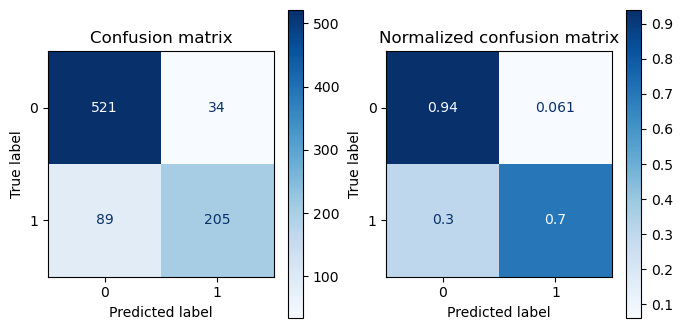

In [500]:
get_evaluation(y_test, prediction, xgb, X_test)

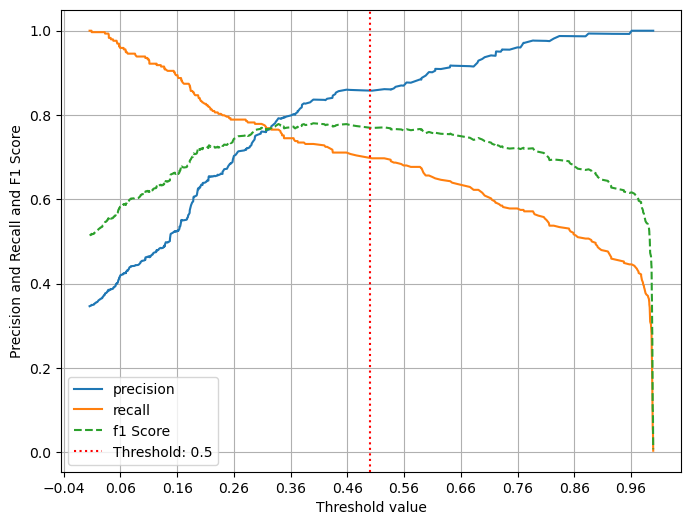

In [501]:
precision_recall_f1_curve_plot(y_test, xgb.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [502]:
proba = xgb.predict_proba(X_test)
prediction = xgb.predict(X_test)

In [503]:
proba_class1 = xgb.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.00570349, 0.00642699, 0.00669705, 0.0077544 , 0.00801883,
       0.0083247 , 0.00879578, 0.0091314 , 0.00913624, 0.00936235,
       0.01064819, 0.01139686, 0.01321448, 0.01324615, 0.01339163,
       0.01362638, 0.01457041, 0.01490041, 0.01561085, 0.01592663,
       0.01593695, 0.01622708, 0.01643355, 0.01727472, 0.01822898,
       0.01832124, 0.01927016, 0.01972123, 0.01995512, 0.02027622,
       0.02047838, 0.02118094, 0.02158284, 0.02161033, 0.022188  ,
       0.02295152, 0.02313276, 0.02425257, 0.02468575, 0.02473711,
       0.02556635, 0.02645406, 0.02792688, 0.02825557, 0.02847887,
       0.02866423, 0.02868073, 0.0287188 , 0.02961625, 0.030058  ,
       0.03092157, 0.0316947 , 0.0317561 , 0.03176177, 0.03245778,
       0.03299943, 0.03375029, 0.03377933, 0.03463277, 0.03572658,
       0.03638693, 0.03643525, 0.03663919, 0.03682596, 0.0375456 ,
       0.0375725 , 0.03791243, 0.03807802, 0.03862878, 0.03884875,
       0.03953853, 0.03956246, 0.0396419 , 0.03997739, 0.04168

In [504]:
proba = xgb.predict_proba(X_test)
prediction = xgb.predict(X_test)

In [505]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0057034893
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.0064269914
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.006697046
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.007754396
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.008018826
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.008324701
오차 행렬
[[  6 549]
 [  0 294]]
정확도: 0.3534,

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[434 121]
 [ 58 236]]
정확도: 0.7892, 정밀도: 0.6611, 재현율: 0.8027, F1: 0.7250, ROC-AUC: 0.7924
################################################################################


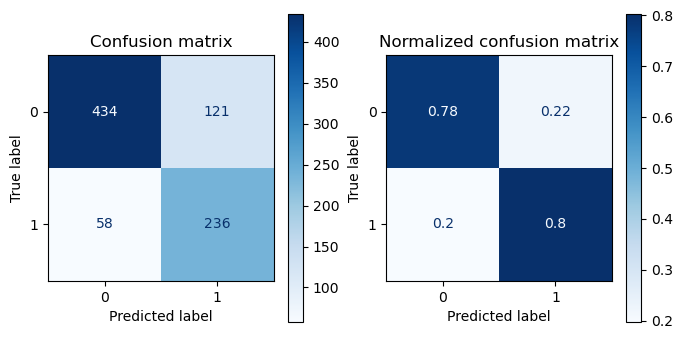

In [506]:
from sklearn.preprocessing import Binarizer

threshold = 0.2358645

proba = xgb.predict_proba(X_test)
prediction = xgb.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 1 Cycle
임계치 조정 후의 모델 성능이 나쁘지는 않지만 정밀도와 재현율 수치를 조금 더 올려보기 위해서 타겟 데이터의 비중을 맞춰보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8551  | 0.8577  | 0.6973  | 0.7692  | 0.8180  |
| 1C(조정후) | 0.7892  | 0.6611  | 0.8027  | 0.7250  | 0.7924  |

In [507]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.LeaveOrNot

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [508]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.57106	validation_1-logloss:0.57498
[1]	validation_0-logloss:0.50242	validation_1-logloss:0.50680
[2]	validation_0-logloss:0.45969	validation_1-logloss:0.46385
[3]	validation_0-logloss:0.43182	validation_1-logloss:0.43719
[4]	validation_0-logloss:0.41295	validation_1-logloss:0.41683
[5]	validation_0-logloss:0.39848	validation_1-logloss:0.40173
[6]	validation_0-logloss:0.38799	validation_1-logloss:0.39169
[7]	validation_0-logloss:0.38183	validation_1-logloss:0.38421
[8]	validation_0-logloss:0.37698	validation_1-logloss:0.37771
[9]	validation_0-logloss:0.37091	validation_1-logloss:0.37055
[10]	validation_0-logloss:0.36491	validation_1-logloss:0.36737
[11]	validation_0-logloss:0.36075	validation_1-logloss:0.36260
[12]	validation_0-logloss:0.35860	validation_1-logloss:0.36184
[13]	validation_0-logloss:0.35679	validation_1-logloss:0.35935
[14]	validation_0-logloss:0.35417	validation_1-logloss:0.35491
[15]	validation_0-logloss:0.35257	validation_1-logloss:0.35352
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-logloss:0.30032	validation_1-logloss:0.29479
[52]	validation_0-logloss:0.29942	validation_1-logloss:0.29351
[53]	validation_0-logloss:0.29890	validation_1-logloss:0.29279
[54]	validation_0-logloss:0.29811	validation_1-logloss:0.29167
[55]	validation_0-logloss:0.29753	validation_1-logloss:0.29174
[56]	validation_0-logloss:0.29691	validation_1-logloss:0.29047
[57]	validation_0-logloss:0.29631	validation_1-logloss:0.29005
[58]	validation_0-logloss:0.29599	validation_1-logloss:0.28968
[59]	validation_0-logloss:0.29529	validation_1-logloss:0.28924
[60]	validation_0-logloss:0.29454	validation_1-logloss:0.28798
[61]	validation_0-logloss:0.29412	validation_1-logloss:0.28677
[62]	validation_0-logloss:0.29352	validation_1-logloss:0.28587
[63]	validation_0-logloss:0.29266	validation_1-logloss:0.28496
[64]	validation_0-logloss:0.29223	validation_1-logloss:0.28456
[65]	validation_0-logloss:0.29192	validation_1-logloss:0.28307
[66]	validation_0-logloss:0.29114	validation_1-logloss:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [509]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.817881   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.819010   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.817884   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.814509   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.813607   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.811356   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.813382   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.814057   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.810905   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.813608   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.813608   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.814058   
12     {'learning_rate': 1, 'n_estimators': 50}         0.811579   
13    {'learning_rate': 1, 'n_estimators': 100}         0.812484   
14    {'learning_rate': 1, 'n_estimators': 150}         0.811808   
15    {'learning_rate': 1, 'n_estimators': 200}         0.811358   

    rank_test_score  
0                 3  
1                 1  
2                 2  
3                 4  
4                 9  
5                15  
6                10  
7                 6  
8                16  
9                 8  
10                7  
11                5  
12               13  
13               11  
14               12  
15               14

In [510]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

오차 행렬
[[484  71]
 [ 77 217]]
정확도: 0.8257, 정밀도: 0.7535, 재현율: 0.7381, F1: 0.7457, ROC-AUC: 0.8051
################################################################################


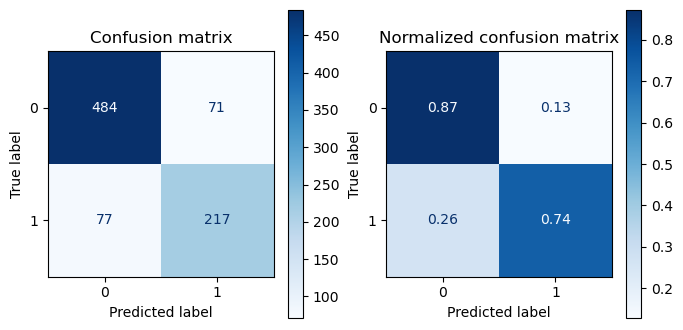

In [511]:
get_evaluation(y_test, prediction, xgb, X_test)

In [512]:
proba = xgb.predict_proba(X_test)
prediction = xgb.predict(X_test)

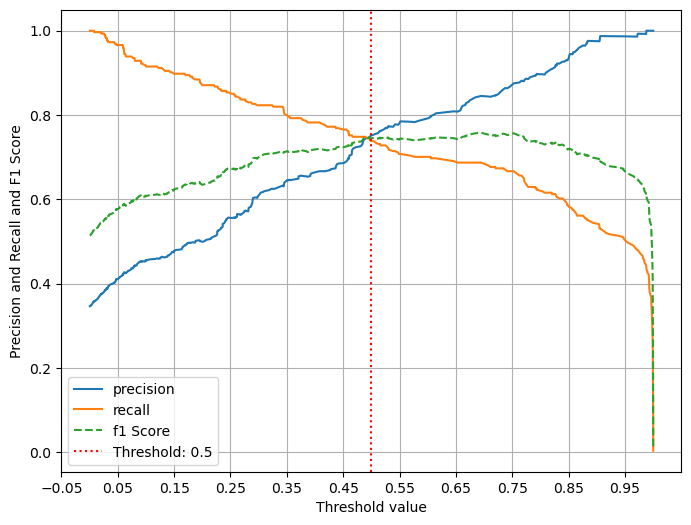

In [513]:
precision_recall_f1_curve_plot(y_test, xgb.predict_proba(X_test)[:, -1].reshape(-1, 1))

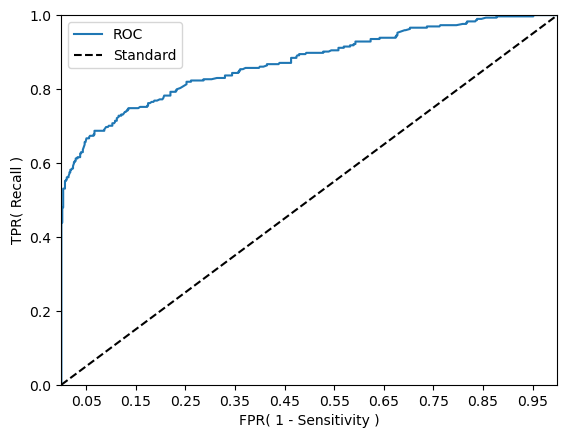

In [514]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [516]:
proba = xgb.predict_proba(X_test)
prediction = xgb.predict(X_test)

In [517]:
proba_class1 = xgb.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([3.91820213e-04, 1.45619398e-03, 1.97682553e-03, 2.08703754e-03,
       2.18206132e-03, 2.22159130e-03, 2.57133646e-03, 3.23749240e-03,
       3.61673324e-03, 4.18424420e-03, 4.39399667e-03, 4.40568756e-03,
       4.99251857e-03, 5.01104258e-03, 5.16107725e-03, 5.22643141e-03,
       5.33578498e-03, 5.52297803e-03, 5.79105597e-03, 5.79935312e-03,
       5.90049243e-03, 6.40952494e-03, 6.41208515e-03, 6.81877322e-03,
       7.05617387e-03, 7.87583459e-03, 7.89191760e-03, 8.07022117e-03,
       8.16402491e-03, 8.45137145e-03, 9.36735235e-03, 9.82446410e-03,
       1.02457292e-02, 1.03109367e-02, 1.13410847e-02, 1.14956954e-02,
       1.19515955e-02, 1.25758685e-02, 1.32548027e-02, 1.34873716e-02,
       1.42564075e-02, 1.48735177e-02, 1.53232459e-02, 1.62068624e-02,
       1.64725706e-02, 1.68157835e-02, 1.73395537e-02, 1.74396895e-02,
       1.74983311e-02, 1.77629702e-02, 1.83558501e-02, 1.84678864e-02,
       1.88065078e-02, 1.88203845e-02, 1.93370953e-02, 1.95917990e-02,
      

In [518]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0003918202
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.001456194
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.0019768255
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.0020870375
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.0021820613
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.0022215913
오차 행렬
[[  7 548]
 [  0 294]]
정확도: 0.35

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[440 115]
 [ 64 230]]
정확도: 0.7892, 정밀도: 0.6667, 재현율: 0.7823, F1: 0.7199, ROC-AUC: 0.7876
################################################################################


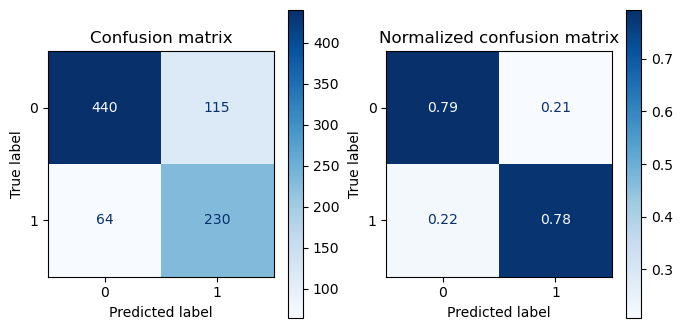

In [519]:
from sklearn.preprocessing import Binarizer

threshold = 0.39626932

proba = xgb.predict_proba(X_test)
prediction = xgb.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 2 Cycle
타겟 데이터의 비중을 맞추었더니 재현율을 상승하고 정밀도는 낮아진 것을 확인했다.  
다음으로는 LightGBM 방식을 이용하여 모델을 훈련시키고자 한다.  

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8551  | 0.8577  | 0.6973  | 0.7692  | 0.8180  |
| 1C(조정후) | 0.7892  | 0.6611  | 0.8027  | 0.7250  | 0.7924  |
| 2C(조정전) | 0.8257  | 0.7535  | 0.7381  | 0.7457  | 0.8051  |
| 2C(조정후) | 0.7892  | 0.6667  | 0.7823  | 0.7199  | 0.7876  |

### 🆕 LightGBM

In [520]:
pre_e_df = e_df.copy()

In [521]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Number of positive: 1175, number of negative: 2221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 3396, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345995 -> initscore=-0.636689
[LightGBM] [Info] Start training from score -0.636689


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 200, 500]},
             return_train_score=True)

In [522]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

lgbm = g_lgbm.best_estimator_

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.838931   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.826567   
2   {'learning_rate': 0.3, 'n_estimators': 200}         0.813906   
3   {'learning_rate': 0.3, 'n_estimators': 500}         0.807131   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.827152   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.818028   
6   {'learning_rate': 0.5, 'n_estimators': 200}         0.809783   
7   {'learning_rate': 0.5, 'n_estimators': 500}         0.804482   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.820676   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.815377   
10  {'learning_rate': 0.7, 'n_estimators': 200}         0.805952   
11  {'learning_rate': 0.7, 'n_estimators': 500}         0.801832   
12     {'learning_rate': 1, 'n_estimators': 50}         0.811843   
13    {'learning_rate': 1, 'n_estimators': 100}         0.807427   
14    {'learning_rate': 1, 'n_estimators': 200}         0.803893   
15    {'learning_rate': 1, 'n_estimators': 500}         0.799770   

    rank_test_score  
0                 1  
1                 3  
2                 7  
3                11  
4                 2  
5                 5  
6                 9  
7                13  
8                 4  
9                 6  
10               12  
11               15  
12                8  
13               10  
14               14  
15               16

In [523]:
prediction = lgbm.predict(X_test)

오차 행렬
[[519  36]
 [ 91 203]]
정확도: 0.8504, 정밀도: 0.8494, 재현율: 0.6905, F1: 0.7617, ROC-AUC: 0.8128
################################################################################


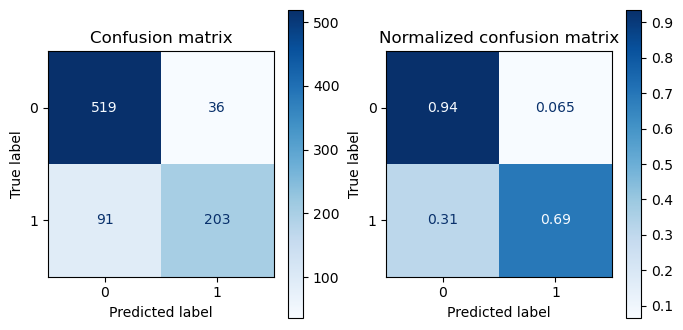

In [524]:
get_evaluation(y_test, prediction, lgbm, X_test)

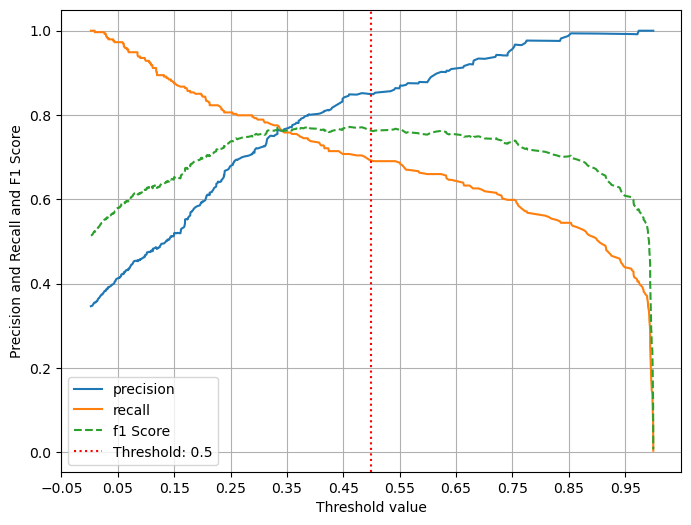

In [525]:
precision_recall_f1_curve_plot(y_test, lgbm.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [526]:
proba = lgbm.predict_proba(X_test)
prediction = lgbm.predict(X_test)

In [527]:
proba_class1 = lgbm.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.00230604, 0.00385893, 0.00406104, 0.00454681, 0.00541704,
       0.00554548, 0.00555025, 0.00582807, 0.00605397, 0.00620167,
       0.00644203, 0.00689699, 0.00710719, 0.00734453, 0.00762602,
       0.00775687, 0.0078018 , 0.00862439, 0.00897959, 0.00920654,
       0.00981069, 0.01020965, 0.01062383, 0.01126398, 0.01165108,
       0.01187186, 0.01193067, 0.01311297, 0.01357843, 0.01371839,
       0.01391017, 0.01419009, 0.01432923, 0.01444729, 0.01457405,
       0.0151919 , 0.01519858, 0.01552989, 0.01586318, 0.01667489,
       0.01688178, 0.01705546, 0.01791941, 0.01813955, 0.01863204,
       0.01881851, 0.01884473, 0.01904111, 0.01944402, 0.01991093,
       0.02003043, 0.02006189, 0.02057576, 0.02084984, 0.02116979,
       0.02296398, 0.02303751, 0.02305726, 0.0231998 , 0.02334501,
       0.02393503, 0.02464648, 0.02475979, 0.02496489, 0.0255029 ,
       0.0263854 , 0.02756977, 0.02842401, 0.02890257, 0.02913234,
       0.02948085, 0.0296141 , 0.02979269, 0.03023802, 0.03025

In [528]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0023060381250076915
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.003858933882530743
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.004061037369335104
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.004546808092336812
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.0054170378549894
오차 행렬
[[  6 549]
 [  0 294]]
정확도: 0.3534, 정밀도: 0.3488, 재현율: 1.0000, F1: 0.5172, ROC-AUC: 0.5054
################################################################################
0.005545484

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[451 104]
 [ 58 236]]
정확도: 0.8092, 정밀도: 0.6941, 재현율: 0.8027, F1: 0.7445, ROC-AUC: 0.8077
################################################################################


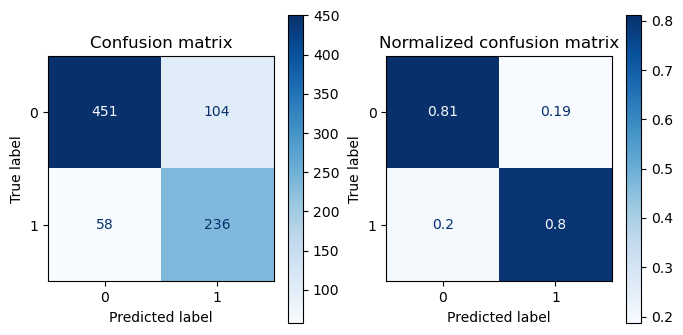

In [529]:
from sklearn.preprocessing import Binarizer

threshold = 0.2564645500167821

proba = lgbm.predict_proba(X_test)
prediction = lgbm.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 1 Cycle
정밀도가 재현율보다 높게 나와서 임계치를 올려 재현율이 높아지게끔 조정했다.  
타겟 데이터 비중을 맞춰서 전체 성능을 올려보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8504  | 0.8494  | 0.6905  | 0.7617  | 0.8128  |
| 1C(조정후) | 0.8092  | 0.6941  | 0.8027  | 0.7445  | 0.8077  |

In [530]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 2221, number of negative: 2221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 4442, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 200, 500]},
             return_train_score=True)

In [531]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

lgbm = g_lgbm.best_estimator_

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.813829   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.816757   
2   {'learning_rate': 0.3, 'n_estimators': 200}         0.814283   
3   {'learning_rate': 0.3, 'n_estimators': 500}         0.813608   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.813831   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.815183   
6   {'learning_rate': 0.5, 'n_estimators': 200}         0.816085   
7   {'learning_rate': 0.5, 'n_estimators': 500}         0.814284   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.813831   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.815861   
10  {'learning_rate': 0.7, 'n_estimators': 200}         0.815408   
11  {'learning_rate': 0.7, 'n_estimators': 500}         0.815859   
12     {'learning_rate': 1, 'n_estimators': 50}         0.811581   
13    {'learning_rate': 1, 'n_estimators': 100}         0.816307   
14    {'learning_rate': 1, 'n_estimators': 200}         0.814507   
15    {'learning_rate': 1, 'n_estimators': 500}         0.810681   

    rank_test_score  
0                13  
1                 1  
2                10  
3                14  
4                12  
5                 7  
6                 3  
7                 9  
8                11  
9                 4  
10                6  
11                5  
12               15  
13                2  
14                8  
15               16

In [532]:
prediction = lgbm.predict(X_test)

오차 행렬
[[473  82]
 [ 73 221]]
정확도: 0.8174, 정밀도: 0.7294, 재현율: 0.7517, F1: 0.7404, ROC-AUC: 0.8020
################################################################################


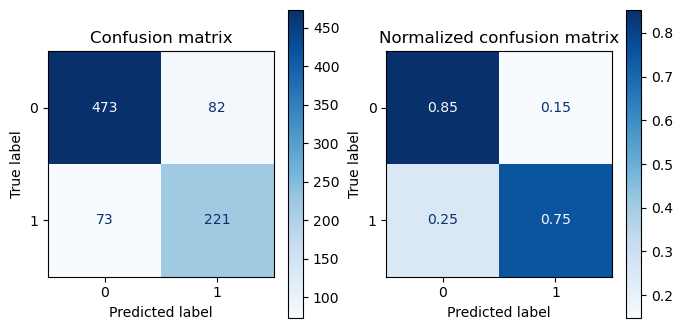

In [533]:
get_evaluation(y_test, prediction, lgbm, X_test)

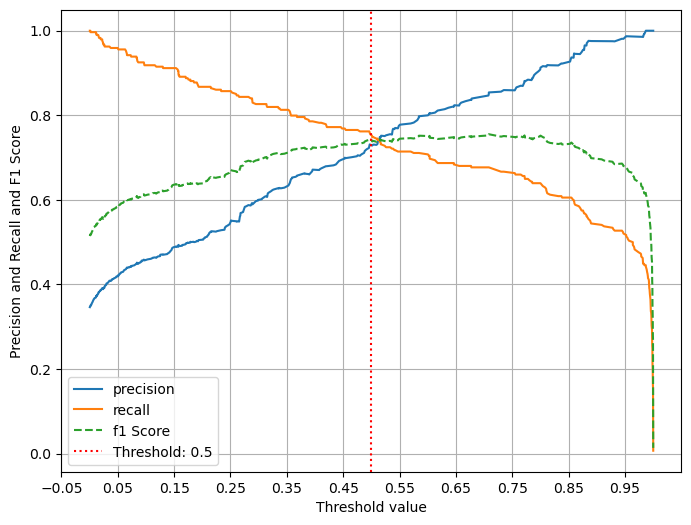

In [534]:
precision_recall_f1_curve_plot(y_test, lgbm.predict_proba(X_test)[:, -1].reshape(-1, 1))

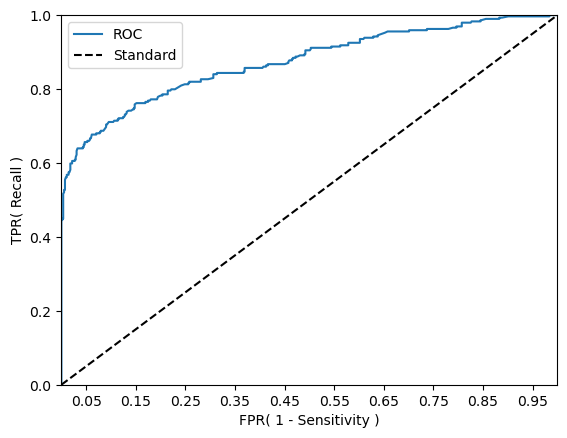

In [535]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lgbm.predict_proba(X_test)[:, -1].reshape(-1, 1))

In [536]:
proba_class1 = lgbm.predict_proba(X_test)[:, -1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([4.09542480e-04, 4.39551803e-04, 6.26700390e-04, 6.92406331e-04,
       1.05723229e-03, 1.09116918e-03, 1.24828367e-03, 1.39262787e-03,
       1.42516476e-03, 1.50972536e-03, 1.51793495e-03, 2.07760349e-03,
       2.30672038e-03, 2.39395658e-03, 2.68623203e-03, 2.80879938e-03,
       3.02690756e-03, 3.03862883e-03, 3.36066646e-03, 3.39349522e-03,
       3.45356475e-03, 3.71212594e-03, 3.80339124e-03, 4.18646447e-03,
       4.37443825e-03, 4.58903084e-03, 4.89290491e-03, 4.99778192e-03,
       5.12290155e-03, 5.37100506e-03, 5.53066958e-03, 5.70713993e-03,
       5.82043593e-03, 5.98282771e-03, 6.19834310e-03, 6.22467589e-03,
       6.99197066e-03, 7.02648913e-03, 7.28634696e-03, 7.43586644e-03,
       7.48902904e-03, 8.08549684e-03, 8.27532692e-03, 8.27579828e-03,
       8.50242537e-03, 9.03466169e-03, 1.03610183e-02, 1.09177743e-02,
       1.13669651e-02, 1.15838623e-02, 1.18580022e-02, 1.23424130e-02,
       1.24193873e-02, 1.24311624e-02, 1.33247583e-02, 1.34595931e-02,
      

In [537]:
proba = lgbm.predict_proba(X_test)
prediction = lgbm.predict(X_test)

In [538]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)
        
get_evaluation_by_thresholds(y_test, proba[:, -1].reshape(-1, 1), thresholds)

0.0004095424804886825
오차 행렬
[[  1 554]
 [  0 294]]
정확도: 0.3475, 정밀도: 0.3467, 재현율: 1.0000, F1: 0.5149, ROC-AUC: 0.5009
################################################################################
0.000439551802540937
오차 행렬
[[  2 553]
 [  0 294]]
정확도: 0.3486, 정밀도: 0.3471, 재현율: 1.0000, F1: 0.5153, ROC-AUC: 0.5018
################################################################################
0.0006267003898461502
오차 행렬
[[  3 552]
 [  0 294]]
정확도: 0.3498, 정밀도: 0.3475, 재현율: 1.0000, F1: 0.5158, ROC-AUC: 0.5027
################################################################################
0.0006924063312797385
오차 행렬
[[  4 551]
 [  0 294]]
정확도: 0.3510, 정밀도: 0.3479, 재현율: 1.0000, F1: 0.5162, ROC-AUC: 0.5036
################################################################################
0.0010572322850179333
오차 행렬
[[  5 550]
 [  0 294]]
정확도: 0.3522, 정밀도: 0.3483, 재현율: 1.0000, F1: 0.5167, ROC-AUC: 0.5045
################################################################################
0.0010

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[471  84]
 [ 70 224]]
정확도: 0.8186, 정밀도: 0.7273, 재현율: 0.7619, F1: 0.7442, ROC-AUC: 0.8053
################################################################################


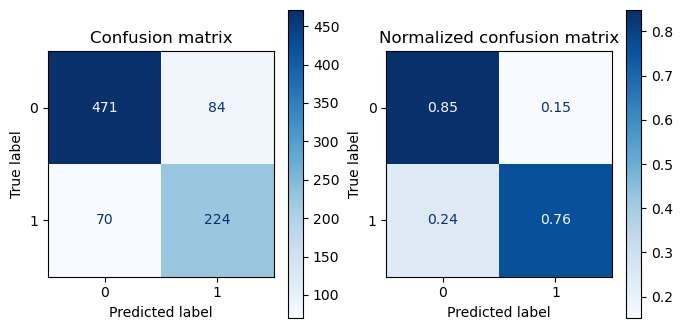

In [539]:
from sklearn.preprocessing import Binarizer

threshold = 0.49549321233396293

proba = lgbm.predict_proba(X_test)
prediction = lgbm.predict(X_test)

custom_proba = proba[:, -1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

#### 2 Cycle
타겟 데이터의 비중을 맞추니 재현율이 올라가고 정밀도가 낮아진 것을 확인했다.  
마지막으로 Voting 방식으로 모델을 훈련하고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(조정전) | 0.8504  | 0.8494  | 0.6905  | 0.7617  | 0.8128  |
| 1C(조정후) | 0.8092  | 0.6941  | 0.8027  | 0.7445  | 0.8077  |
| 2C(조정전) | 0.8174  | 0.7294  | 0.7517  | 0.7404  | 0.8020  |
| 2C(조정후) | 0.8186  | 0.7273  | 0.7619  | 0.7442  | 0.8053  |

### 🆕 Voting

In [541]:
pre_e_df = e_df.copy()

In [542]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [564]:
from sklearn.ensemble import VotingClassifier

# 오차 행렬
# [[490  65]
#  [ 75 219]]
# 정확도: 0.8351, 정밀도: 0.7711, 재현율: 0.7449, F1: 0.7578, ROC-AUC: 0.8139
vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('rfc', rfc), 
                             ('lgbm', lgbm)], 
                 voting='hard', 
                 n_jobs=-1)


# 오차 행렬
# [[485  70]
#  [ 78 216]]
# 정확도: 0.8257, 정밀도: 0.7552, 재현율: 0.7347, F1: 0.7448, ROC-AUC: 0.8043
# vc = VotingClassifier(estimators=[('dtc', dtc), 
#                              ('rfc', rfc), 
#                              ('lgbm', lgbm)], 
#                  voting='soft', 
#                  n_jobs=-1)

In [565]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=15,
                                                     min_samples_split=14)),
                             ('rfc',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_split=24)),
                             ('lgbm', LGBMClassifier(learning_rate=0.3))],
                 n_jobs=-1)

In [566]:
prediction = vc.predict(X_test)

오차 행렬
[[492  63]
 [ 77 217]]
정확도: 0.8351, 정밀도: 0.7750, 재현율: 0.7381, F1: 0.7561, ROC-AUC: 0.8123
################################################################################


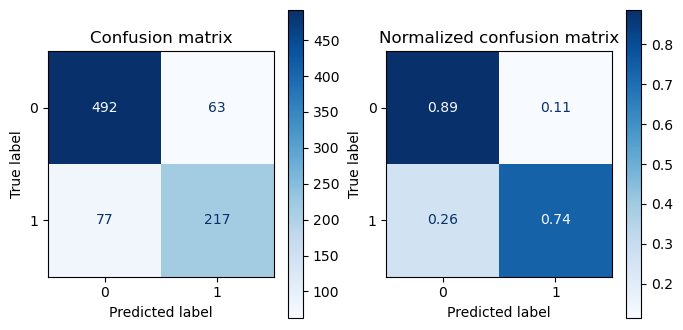

In [567]:
get_evaluation(y_test, prediction, vc, X_test)

#### 1 Cycle
타겟 데이터의 비중을 맞춘 뒤 훈련한 결과, soft 방식과 hard 방식 모두 재현율보다 정밀도의 수치가 더 높았다.  
두 모델의 성능이 많이 차이나지는 않지만, hard 방식으로 훈련한 모델이 조금 더 좋은 성능을 가지고 있다고 판단된다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1C(soft) | 0.8257  | 0.7552  | 0.7347  | 0.7448  | 0.8043  |
| 1C(hard) | 0.8351  | 0.7711  | 0.7449  | 0.7578  | 0.8139  |

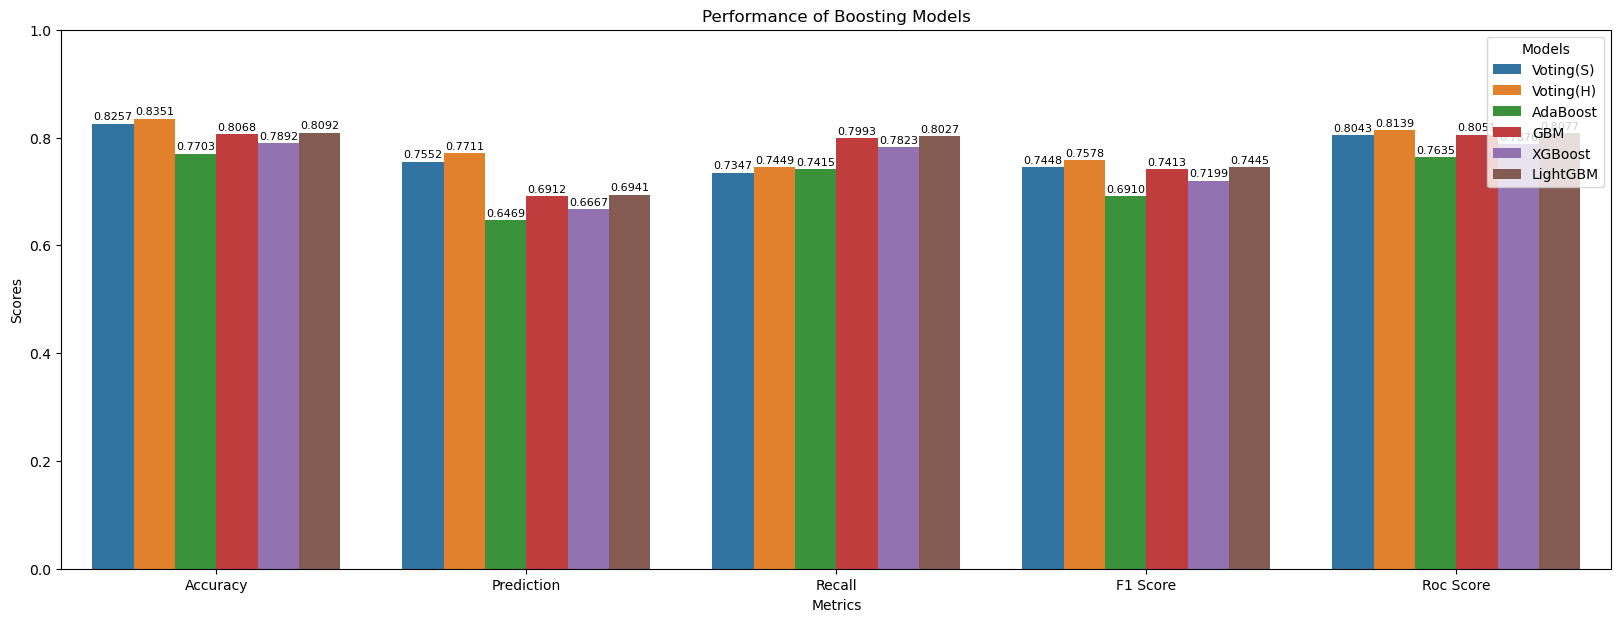

In [569]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 모델에서 얻은 성능 지표 (임의의 값 사용)
model_names = ['Voting(S)', 'Voting(H)', 'AdaBoost', 'GBM', 'XGBoost', 'LightGBM']
accuracy_scores = [0.8257, 0.8351, 0.7703, 0.8068, 0.7892, 0.8092]
prediction_scores = [0.7552, 0.7711, 0.6469, 0.6912, 0.6667, 0.6941] 
recall_scores = [0.7347, 0.7449, 0.7415, 0.7993, 0.7823, 0.8027]
f1_scores = [0.7448, 0.7578, 0.6910, 0.7413, 0.7199, 0.7445]
roc_scores = [0.8043, 0.8139, 0.7635, 0.8051, 0.7876, 0.8077]

# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Prediction': prediction_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Roc Score': roc_scores
})

# 데이터프레임 재구성
df = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# seaborn을 사용하여 barplot 생성
plt.figure(figsize=(20, 7))
ax = sns.barplot(data=df, x='Metric', y='Score', hue='Model')

# 각 막대 위에 수치 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=8)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance of Boosting Models')
plt.ylim(0, 1)  # y축 범위 설정
plt.legend(title='Models')
plt.show()

### 📍 결과
#### [각 수치별 1위]
- Accuracy: 하드 보팅 (0.8292)
- Prediction: 하드 보팅 (0.7614)
- Recall: LGBM (0.8027)
- F1 Score: 하드 보팅 (0.7496)
- ROC Score: 하드 보팅 (0.8078)

#### [각 수치별 5위]
- Accuracy: Ada
- Prediction: Ada
- Recall: 소프트 보팅
- F1 Score: Ada
- ROC Score: Ada

👍 하드 보팅 방식으로 훈련한 모델의 성능이 가장 우수하다.  

👎 AdaBoosting 방식으로 훈련한 모델의 성능이 가장 낮다.